In [1]:
import os#
#os.chdir('c:\\Users\\ma11115\\OneDrive - Imperial College London\\github_folder\\STK_SEARCH\\')
os.chdir("/rds/general/user/ma11115/home/STK_Search/STK_search")
from pathlib import Path#
import pandas as pd
import torch
import numpy as np
import importlib
from stk_search.utils import database_utils

os.makedirs('data/output/search_experiment/search_exp_database', exist_ok=True)

In [2]:
# run a search experiment with the new target
from stk_search.utils import run_hpc_utils
importlib.reload(run_hpc_utils)
df_total_path_bench = 'data/output/Full_dataset/30K_benchmark_150524.csv'
df_precursor_path ="data/output/Prescursor_data/precursor_data_200324.pkl"
df_precursor_Mordred_path="data/output/Prescursor_data/df_PCA_mordred_descriptor_290224.pkl"

search_space_loc = "data/input/EXP_search_space/6_mers_filtered_BB_2024_05_15_09_28_21//search_space_0.pkl"#"data/input/EXP_search_space/6_frag_all_2024_05_11_22_40_37//search_space_0.pkl"

In [3]:
# load and check the search space
from stk_search import Search_space
search_space = pd.read_pickle(search_space_loc)
print(' Search space condition list:', search_space.conditions_list)
print('shape of df_precursors:', search_space.df_precursors.shape)
print('search space syntax:', search_space.syntax)


 Search space condition list: [[], [], [], [], [], []]
shape of df_precursors: (274, 49)
search space syntax: [0, 1, 2, 3, 4, 5]


In [4]:
# load and check the dataframe to search over and the df_precursors
df_Benchmark , df_precursors= database_utils.load_data_from_file(df_total_path_bench, df_precursor_path,add_feature_frag=True)
df_precursor_Mordred = pd.read_pickle(df_precursor_Mordred_path)
print('shape of df_Benchmark:', df_Benchmark.shape)
print('shape of df_precursors:', df_precursors.shape)
print('shape of df_precursor_Mordred:', df_precursor_Mordred.shape)
print(df_Benchmark[df_Benchmark['target']>0].shape[0]/df_Benchmark.shape[0])

shape of df_Benchmark: (30000, 207)
shape of df_precursors: (306, 40)
shape of df_precursor_Mordred: (312, 101)
0.0111


In [5]:
num_of_elem_in_SP = search_space.check_df_for_element_from_SP(df_Benchmark).shape
print('number of elements in the benchmark in the search space:', num_of_elem_in_SP)

number of elements in the benchmark in the search space: (30000, 207)


In [6]:
# set the benchmark parameters  
exp_name = "Benchmark_56K_dataset"
num_elem_initialisation=50
num_iteration=500
target = 'target'
aim = 'maximise'
case_name_list = ["ea_surrogate_new", "BO_learned_new"] # ['evolution_algorithm','random','BO_precursor']#,["ea_surrogate_new", "BO_learned_new"] # "ea_surrogate", "BO_learned"
config_dir_list = ["/rds/general/user/ma11115/home/STK_Search/STK_search/data/representation_learning/6-frag/target/240322/SchNet/splitrand-nummol50000"]
config_dir_list_new = ["/rds/general/user/ma11115/home/STK_Search/STK_search/data/representation_learning/6-frag/target/240412/SchNet/splitrand-nummol68864"]
#config_dir_list_new = ["/rds/general/user/ma11115/home/STK_Search/STK_search/data/representation_learning/6-frag/target/240516//SchNet/splitrand-nummol20000/"]
config_dir_list_new = [f"/rds/general/user/ma11115/home/STK_Search/STK_search/data/representation_learning/6-frag/target/240516/SchNet/splitrand-nummol{num_mol}" for num_mol in [10000,20000]]

In [7]:
# check the representation generated using the learned representation ( using a gnn for each fragment)
config_dir = config_dir_list[0]
from src.dev_scripts.run_search_new import load_representation_BO_graph_frag
representation = load_representation_BO_graph_frag(config_dir,df_total_path_bench)
representation.generate_repr(df_Benchmark[[f'InChIKey_{i}' for i in range(6)]].loc[0:100,:])

config loaded from /rds/general/user/ma11115/home/STK_Search/STK_search/data/representation_learning/6-frag/target/240322/SchNet/splitrand-nummol50000
/rds/general/user/ma11115/home/STK_Search/STK_search/data/representation_learning/6-frag/target/240322//SchNet/splitrand-nummol50000//transformer/epoch=43-val_loss=0.42-other_metric=0.00.ckpt
no dataset found
Model loaded:  /rds/general/user/ma11115/home/STK_Search/STK_search/data/representation_learning/6-frag/target/240322/SchNet/splitrand-nummol50000/epoch=18-val_loss=0.21-other_metric=0.00.ckpt
lr 0.0005
loading model from checkpoint /rds/general/user/ma11115/home/STK_Search/STK_search/data/representation_learning/6-frag/target/240322//SchNet/splitrand-nummol50000//transformer/epoch=43-val_loss=0.42-other_metric=0.00.ckpt


tensor([[-0.2190, -0.8119, -0.2114,  ...,  1.2795, -1.1144, -0.6874],
        [-0.3359, -0.7804, -0.1105,  ...,  1.2327, -1.1164, -0.6467],
        [-0.2828, -0.6610, -0.1364,  ...,  0.9725, -0.9670, -0.6088],
        ...,
        [ 0.2659,  0.0685, -0.2045,  ...,  0.4034, -1.1325,  0.4292],
        [-0.7570, -0.6297,  0.0800,  ...,  0.9786, -1.2912, -0.7561],
        [ 0.2412,  0.1611, -0.3039,  ...,  0.2308, -0.8912,  0.3342]])

In [8]:
# check the representation generated using the learned representation building the polymer from fragment for 
config_dir = config_dir_list_new[1]
from src.dev_scripts.run_search_new import load_representation_model
representation, pymodel = load_representation_model(config_dir)
representation.generate_repr(df_Benchmark[[f'InChIKey_{i}' for i in range(6)]].loc[0:100,:])

config loaded from /rds/general/user/ma11115/home/STK_Search/STK_search/data/representation_learning/6-frag/target/240516/SchNet/splitrand-nummol20000
Model loaded:  SchNet


Pandas Apply:   0%|          | 0/101 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/101 [00:00<?, ?it/s]

tensor([[ 0.1137,  0.3956,  0.6397,  ..., -0.5438, -0.0814, -0.3486],
        [ 0.1293,  0.4832,  0.6539,  ..., -0.5233, -0.0601, -0.4207],
        [ 0.1234,  0.4112,  0.6220,  ..., -0.5335, -0.0659, -0.3519],
        ...,
        [ 0.0936,  0.1928,  0.4585,  ..., -0.5231, -0.0470, -0.3513],
        [ 0.1631,  0.4564,  0.5701,  ..., -0.5862,  0.0118, -0.4835],
        [ 0.1145,  0.2365,  0.5012,  ..., -0.5863, -0.0339, -0.4775]])

In [9]:
importlib.reload(run_hpc_utils)

def run_search_on_hpc(
    case_name="ea_surrogate",
    df_path_total=df_total_path_bench,
    df_precursors_path=df_precursor_path,
    frag_properties="selected",
    config_dir="",
    dataset_representation_path = None,
    test=False,
    lim_counter = 5,
    which_acquisition = "EI",

):
    string_to_run_notebook, script_qsub = run_hpc_utils.generate_string_run(
        case=case_name,
        target=target,
        aim=aim,
        num_elem_initialisation=num_elem_initialisation,
        num_iteration=num_iteration,
        df_path=df_path_total,
        benchmark=True,
        test_name=exp_name,
        df_precursors_path=df_precursors_path,
        frag_properties=frag_properties,
        config_dir=config_dir,
        dataset_representation_path=dataset_representation_path,
        lim_counter = lim_counter,
        which_acquisition = which_acquisition,
        search_space_loc = search_space_loc,
    )
    if test:
        %run {string_to_run_notebook}
        return string_to_run_notebook
    run_hpc_utils.submit_job(script_qsub, case_name)




In [55]:
importlib.reload(BayesianOptimisation_ErrPred)
importlib.reload(BayesianOptimisation)


run_search_on_hpc(
                case_name="BayesianOptimisation_ErrPred",
                df_precursors_path=df_precursor_Mordred_path,
                frag_properties="all",
                which_acquisition = "EI_GNN",
                config_dir = config_dir_list_new[1],
                test=True
        )

src/dev_scripts/run_search_new.py  --case BayesianOptimisation_ErrPred --test_name Benchmark_56K_dataset --target target --aim maximise --benchmark 1 --num_iteration 500 --num_elem_initialisation 50 --which_acquisition EI_GNN --dataset_representation_path None --df_path data/output/Full_dataset/30K_benchmark_150524.csv --df_precursors_path data/output/Prescursor_data/df_PCA_mordred_descriptor_290224.pkl --config_dir /rds/general/user/ma11115/home/STK_Search/STK_search/data/representation_learning/6-frag/target/240516/SchNet/splitrand-nummol20000 --search_space_loc /rds/general/user/ma11115/home/STK_Search/STK_search/data/input/search_space/test/search_space1.pkl --frag_properties all --lim_counter 5 --budget None
 number of fragment 6
True benchmark
BayesianOptimisation_ErrPred   case  
config loaded from /rds/general/user/ma11115/home/STK_Search/STK_search/data/representation_learning/6-frag/target/240516/SchNet/splitrand-nummol20000
Model loaded:  SchNet
Inputs saved.
element Inchike

Pandas Apply:   0%|          | 0/50 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/50 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/105 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/55 [00:00<?, ?it/s]

size of representation dataset  105


Pandas Apply:   0%|          | 0/294 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/189 [00:00<?, ?it/s]

size of representation dataset  294
when merged df_elements size is  399
df_elements size is  387


Pandas Apply:   0%|          | 0/313 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/19 [00:00<?, ?it/s]

size of representation dataset  313
when merged df_elements size is  700
df_elements size is  688


Pandas Apply:   0%|          | 0/405 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/92 [00:00<?, ?it/s]

size of representation dataset  405
when merged df_elements size is  1093
df_elements size is  313


Pandas Apply:   0%|          | 0/203 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

size of representation dataset  410
when merged df_elements size is  516
df_elements size is  516


Pandas Apply:   0%|          | 0/210 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/7 [00:00<?, ?it/s]

size of representation dataset  417
when merged df_elements size is  726
df_elements size is  726


Pandas Apply:   0%|          | 0/226 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/13 [00:00<?, ?it/s]

size of representation dataset  430
when merged df_elements size is  952
df_elements size is  952
element Inchikey suggested: SXMLEVZHJKIRTB-UHFFFAOYSA-N, Eval: -0.2356787851133618
iteration 0 completed
max fitness acquired: -0.2076497937319179
min fitness acquired: -3.759171964321762
new fitness acquired: -0.2356787851133618


Pandas Apply:   0%|          | 0/51 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/86 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4 [00:00<?, ?it/s]

size of representation dataset  434


Pandas Apply:   0%|          | 0/131 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/22 [00:00<?, ?it/s]

size of representation dataset  456
when merged df_elements size is  217
df_elements size is  208


Pandas Apply:   0%|          | 0/148 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/16 [00:00<?, ?it/s]

size of representation dataset  472
when merged df_elements size is  356
df_elements size is  347


Pandas Apply:   0%|          | 0/160 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/10 [00:00<?, ?it/s]

size of representation dataset  482
when merged df_elements size is  507
df_elements size is  383


Pandas Apply:   0%|          | 0/161 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/1 [00:00<?, ?it/s]

size of representation dataset  483
when merged df_elements size is  544
df_elements size is  394


Pandas Apply:   0%|          | 0/161 [00:00<?, ?it/s]

size of representation dataset  483
when merged df_elements size is  555
df_elements size is  400


Pandas Apply:   0%|          | 0/171 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/9 [00:00<?, ?it/s]

size of representation dataset  492
when merged df_elements size is  571
df_elements size is  410
element Inchikey suggested: OZAAYFNOYBCVDV-UHFFFAOYSA-N, Eval: -0.2975393258090975
iteration 1 completed
max fitness acquired: -0.2076497937319179
min fitness acquired: -3.759171964321762
new fitness acquired: -0.2975393258090975


Pandas Apply:   0%|          | 0/52 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/87 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

size of representation dataset  497


Pandas Apply:   0%|          | 0/120 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/12 [00:00<?, ?it/s]

size of representation dataset  509
when merged df_elements size is  207
df_elements size is  184


Pandas Apply:   0%|          | 0/139 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

size of representation dataset  514
when merged df_elements size is  323
df_elements size is  318


Pandas Apply:   0%|          | 0/221 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/79 [00:00<?, ?it/s]

size of representation dataset  593
when merged df_elements size is  539
df_elements size is  537


Pandas Apply:   0%|          | 0/230 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/8 [00:00<?, ?it/s]

size of representation dataset  601
when merged df_elements size is  767
df_elements size is  765


Pandas Apply:   0%|          | 0/242 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/12 [00:00<?, ?it/s]

size of representation dataset  613
when merged df_elements size is  1007
df_elements size is  833


Pandas Apply:   0%|          | 0/271 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/39 [00:00<?, ?it/s]

size of representation dataset  652
when merged df_elements size is  1104
df_elements size is  233


Pandas Apply:   0%|          | 0/117 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/7 [00:00<?, ?it/s]

size of representation dataset  659
when merged df_elements size is  350
df_elements size is  350


Pandas Apply:   0%|          | 0/124 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/7 [00:00<?, ?it/s]

size of representation dataset  666
when merged df_elements size is  474
df_elements size is  474


Pandas Apply:   0%|          | 0/171 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/25 [00:00<?, ?it/s]

size of representation dataset  691
when merged df_elements size is  645
df_elements size is  645


Pandas Apply:   0%|          | 0/188 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/14 [00:00<?, ?it/s]

size of representation dataset  705
when merged df_elements size is  833
df_elements size is  833


Pandas Apply:   0%|          | 0/193 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4 [00:00<?, ?it/s]

size of representation dataset  709
when merged df_elements size is  1026
df_elements size is  641


Pandas Apply:   0%|          | 0/165 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/6 [00:00<?, ?it/s]

size of representation dataset  715
when merged df_elements size is  806
df_elements size is  806


Pandas Apply:   0%|          | 0/176 [00:00<?, ?it/s]

size of representation dataset  715
when merged df_elements size is  982
df_elements size is  982


Pandas Apply:   0%|          | 0/182 [00:00<?, ?it/s]

size of representation dataset  715
when merged df_elements size is  1164
df_elements size is  1158
element Inchikey suggested: ZSTCVPJCDQWEKU-UHFFFAOYSA-N, Eval: -1.6761822243213187
iteration 2 completed
max fitness acquired: -0.2076497937319179
min fitness acquired: -3.759171964321762
new fitness acquired: -1.6761822243213187


Pandas Apply:   0%|          | 0/53 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/94 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/10 [00:00<?, ?it/s]

size of representation dataset  725


Pandas Apply:   0%|          | 0/124 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/23 [00:00<?, ?it/s]

size of representation dataset  748
when merged df_elements size is  218
df_elements size is  218


Pandas Apply:   0%|          | 0/140 [00:00<?, ?it/s]

size of representation dataset  748
when merged df_elements size is  358
df_elements size is  358


Pandas Apply:   0%|          | 0/162 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/17 [00:00<?, ?it/s]

size of representation dataset  765
when merged df_elements size is  520
df_elements size is  520


Pandas Apply:   0%|          | 0/164 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/1 [00:00<?, ?it/s]

size of representation dataset  766
when merged df_elements size is  684
df_elements size is  523


Pandas Apply:   0%|          | 0/170 [00:00<?, ?it/s]

size of representation dataset  766
when merged df_elements size is  693
df_elements size is  530


Pandas Apply:   0%|          | 0/172 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/2 [00:00<?, ?it/s]

size of representation dataset  768
when merged df_elements size is  702
df_elements size is  532


Pandas Apply:   0%|          | 0/174 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/2 [00:00<?, ?it/s]

size of representation dataset  770
when merged df_elements size is  706
df_elements size is  534


Pandas Apply:   0%|          | 0/187 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/6 [00:00<?, ?it/s]

size of representation dataset  776
when merged df_elements size is  721
df_elements size is  721


Pandas Apply:   0%|          | 0/187 [00:00<?, ?it/s]

size of representation dataset  776
when merged df_elements size is  908
df_elements size is  722


Pandas Apply:   0%|          | 0/187 [00:00<?, ?it/s]

size of representation dataset  776
when merged df_elements size is  909
df_elements size is  722


Pandas Apply:   0%|          | 0/214 [00:00<?, ?it/s]

size of representation dataset  776
when merged df_elements size is  936
df_elements size is  936


Pandas Apply:   0%|          | 0/218 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4 [00:00<?, ?it/s]

size of representation dataset  780
when merged df_elements size is  1154
df_elements size is  228


Pandas Apply:   0%|          | 0/62 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/3 [00:00<?, ?it/s]

size of representation dataset  783
when merged df_elements size is  290
df_elements size is  290


Pandas Apply:   0%|          | 0/64 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/1 [00:00<?, ?it/s]

size of representation dataset  784
when merged df_elements size is  354
df_elements size is  354


Pandas Apply:   0%|          | 0/78 [00:00<?, ?it/s]

size of representation dataset  784
when merged df_elements size is  432
df_elements size is  432


Pandas Apply:   0%|          | 0/87 [00:00<?, ?it/s]

size of representation dataset  784
when merged df_elements size is  519
df_elements size is  519
element Inchikey suggested: JYHZIDILDQEJLI-UHFFFAOYSA-N, Eval: -0.1034871060963262
iteration 3 completed
max fitness acquired: -0.1034871060963262
min fitness acquired: -3.759171964321762
new fitness acquired: -0.1034871060963262


Pandas Apply:   0%|          | 0/54 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/97 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/2 [00:00<?, ?it/s]

size of representation dataset  786


Pandas Apply:   0%|          | 0/108 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4 [00:00<?, ?it/s]

size of representation dataset  790
when merged df_elements size is  205
df_elements size is  202


Pandas Apply:   0%|          | 0/112 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4 [00:00<?, ?it/s]

size of representation dataset  794
when merged df_elements size is  314
df_elements size is  206


Pandas Apply:   0%|          | 0/130 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/17 [00:00<?, ?it/s]

size of representation dataset  811
when merged df_elements size is  336
df_elements size is  333


Pandas Apply:   0%|          | 0/142 [00:00<?, ?it/s]

size of representation dataset  811
when merged df_elements size is  475
df_elements size is  472


Pandas Apply:   0%|          | 0/143 [00:00<?, ?it/s]

size of representation dataset  811
when merged df_elements size is  615
df_elements size is  473


Pandas Apply:   0%|          | 0/151 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/7 [00:00<?, ?it/s]

size of representation dataset  818
when merged df_elements size is  624
df_elements size is  481


Pandas Apply:   0%|          | 0/153 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/2 [00:00<?, ?it/s]

size of representation dataset  820
when merged df_elements size is  634
df_elements size is  483


Pandas Apply:   0%|          | 0/169 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/2 [00:00<?, ?it/s]

size of representation dataset  822
when merged df_elements size is  652
df_elements size is  649


Pandas Apply:   0%|          | 0/172 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/3 [00:00<?, ?it/s]

size of representation dataset  825
when merged df_elements size is  821
df_elements size is  817


Pandas Apply:   0%|          | 0/172 [00:00<?, ?it/s]

size of representation dataset  825
when merged df_elements size is  989
df_elements size is  817


Pandas Apply:   0%|          | 0/172 [00:00<?, ?it/s]

size of representation dataset  825
when merged df_elements size is  989
df_elements size is  817


Pandas Apply:   0%|          | 0/182 [00:00<?, ?it/s]

size of representation dataset  825
when merged df_elements size is  999
df_elements size is  996


Pandas Apply:   0%|          | 0/195 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/13 [00:00<?, ?it/s]

size of representation dataset  838
when merged df_elements size is  1191
df_elements size is  53
element Inchikey suggested: PVWMTKNOSAPAHM-FOKLQQMPSA-N, Eval: -1.1042382037075638
iteration 4 completed
max fitness acquired: -0.1034871060963262
min fitness acquired: -3.759171964321762
new fitness acquired: -1.1042382037075638


Pandas Apply:   0%|          | 0/55 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/89 [00:00<?, ?it/s]

size of representation dataset  838


Pandas Apply:   0%|          | 0/110 [00:00<?, ?it/s]

size of representation dataset  838
when merged df_elements size is  199
df_elements size is  184


Pandas Apply:   0%|          | 0/140 [00:00<?, ?it/s]

size of representation dataset  838
when merged df_elements size is  324
df_elements size is  232


Pandas Apply:   0%|          | 0/160 [00:00<?, ?it/s]

size of representation dataset  838
when merged df_elements size is  392
df_elements size is  383


Pandas Apply:   0%|          | 0/173 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4 [00:00<?, ?it/s]

size of representation dataset  842
when merged df_elements size is  556
df_elements size is  547


Pandas Apply:   0%|          | 0/175 [00:00<?, ?it/s]

size of representation dataset  842
when merged df_elements size is  722
df_elements size is  574
element Inchikey suggested: WZZCCDNVZDCQFG-UHFFFAOYSA-N, Eval: -0.6900842676290416
iteration 5 completed
max fitness acquired: -0.1034871060963262
min fitness acquired: -3.759171964321762
new fitness acquired: -0.6900842676290416


Pandas Apply:   0%|          | 0/56 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/98 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/7 [00:00<?, ?it/s]

size of representation dataset  849


Pandas Apply:   0%|          | 0/99 [00:00<?, ?it/s]

size of representation dataset  849
when merged df_elements size is  197
df_elements size is  102


Pandas Apply:   0%|          | 0/113 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/6 [00:00<?, ?it/s]

size of representation dataset  855
when merged df_elements size is  215
df_elements size is  201


Pandas Apply:   0%|          | 0/117 [00:00<?, ?it/s]

size of representation dataset  855
when merged df_elements size is  318
df_elements size is  205


Pandas Apply:   0%|          | 0/135 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/10 [00:00<?, ?it/s]

size of representation dataset  865
when merged df_elements size is  340
df_elements size is  325


Pandas Apply:   0%|          | 0/135 [00:00<?, ?it/s]

size of representation dataset  865
when merged df_elements size is  460
df_elements size is  325


Pandas Apply:   0%|          | 0/136 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/1 [00:00<?, ?it/s]

size of representation dataset  866
when merged df_elements size is  461
df_elements size is  326


Pandas Apply:   0%|          | 0/142 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/2 [00:00<?, ?it/s]

size of representation dataset  868
when merged df_elements size is  468
df_elements size is  452
element Inchikey suggested: YHAMITIKEHHSTH-UHFFFAOYSA-N, Eval: -1.0206807763105965
iteration 6 completed
max fitness acquired: -0.1034871060963262
min fitness acquired: -3.759171964321762
new fitness acquired: -1.0206807763105965


Pandas Apply:   0%|          | 0/57 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/101 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/13 [00:00<?, ?it/s]

size of representation dataset  881


Pandas Apply:   0%|          | 0/118 [00:00<?, ?it/s]

size of representation dataset  881
when merged df_elements size is  219
df_elements size is  131


Pandas Apply:   0%|          | 0/123 [00:00<?, ?it/s]

size of representation dataset  881
when merged df_elements size is  254
df_elements size is  253


Pandas Apply:   0%|          | 0/123 [00:00<?, ?it/s]

size of representation dataset  881
when merged df_elements size is  376
df_elements size is  271


Pandas Apply:   0%|          | 0/140 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/14 [00:00<?, ?it/s]

size of representation dataset  895
when merged df_elements size is  411
df_elements size is  411


Pandas Apply:   0%|          | 0/140 [00:00<?, ?it/s]

size of representation dataset  895
when merged df_elements size is  551
df_elements size is  433


Pandas Apply:   0%|          | 0/165 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/1 [00:00<?, ?it/s]

size of representation dataset  896
when merged df_elements size is  598
df_elements size is  598


Pandas Apply:   0%|          | 0/165 [00:00<?, ?it/s]

size of representation dataset  896
when merged df_elements size is  763
df_elements size is  608


Pandas Apply:   0%|          | 0/166 [00:00<?, ?it/s]

size of representation dataset  896
when merged df_elements size is  774
df_elements size is  773


Pandas Apply:   0%|          | 0/166 [00:00<?, ?it/s]

size of representation dataset  896
when merged df_elements size is  939
df_elements size is  788


Pandas Apply:   0%|          | 0/166 [00:00<?, ?it/s]

size of representation dataset  896
when merged df_elements size is  954
df_elements size is  802


Pandas Apply:   0%|          | 0/166 [00:00<?, ?it/s]

size of representation dataset  896
when merged df_elements size is  968
df_elements size is  808
element Inchikey suggested: DYIBYLYAFSSECR-UHFFFAOYSA-N, Eval: -2.278083709552927
iteration 7 completed
max fitness acquired: -0.1034871060963262
min fitness acquired: -3.759171964321762
new fitness acquired: -2.278083709552927


Pandas Apply:   0%|          | 0/58 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/90 [00:00<?, ?it/s]

size of representation dataset  896


Pandas Apply:   0%|          | 0/93 [00:00<?, ?it/s]

size of representation dataset  896
when merged df_elements size is  183
df_elements size is  179


Pandas Apply:   0%|          | 0/98 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

size of representation dataset  901
when merged df_elements size is  277
df_elements size is  272


Pandas Apply:   0%|          | 0/117 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/6 [00:00<?, ?it/s]

size of representation dataset  907
when merged df_elements size is  389
df_elements size is  384


Pandas Apply:   0%|          | 0/120 [00:00<?, ?it/s]

size of representation dataset  907
when merged df_elements size is  504
df_elements size is  387


Pandas Apply:   0%|          | 0/124 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/3 [00:00<?, ?it/s]

size of representation dataset  910
when merged df_elements size is  511
df_elements size is  391


Pandas Apply:   0%|          | 0/124 [00:00<?, ?it/s]

size of representation dataset  910
when merged df_elements size is  515
df_elements size is  391
element Inchikey suggested: XZHWKAKDXGVDCS-UHFFFAOYSA-N, Eval: -0.2271035215809792
iteration 8 completed
max fitness acquired: -0.1034871060963262
min fitness acquired: -3.759171964321762
new fitness acquired: -0.2271035215809792


Pandas Apply:   0%|          | 0/59 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/106 [00:00<?, ?it/s]

size of representation dataset  910


Pandas Apply:   0%|          | 0/120 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4 [00:00<?, ?it/s]

size of representation dataset  914
when merged df_elements size is  226
df_elements size is  224


Pandas Apply:   0%|          | 0/120 [00:00<?, ?it/s]

size of representation dataset  914
when merged df_elements size is  344
df_elements size is  236


Pandas Apply:   0%|          | 0/154 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/16 [00:00<?, ?it/s]

size of representation dataset  930
when merged df_elements size is  390
df_elements size is  388


Pandas Apply:   0%|          | 0/166 [00:00<?, ?it/s]

size of representation dataset  930
when merged df_elements size is  554
df_elements size is  412


Pandas Apply:   0%|          | 0/199 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/27 [00:00<?, ?it/s]

size of representation dataset  957
when merged df_elements size is  611
df_elements size is  610


Pandas Apply:   0%|          | 0/202 [00:00<?, ?it/s]

size of representation dataset  957
when merged df_elements size is  812
df_elements size is  629


Pandas Apply:   0%|          | 0/215 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/9 [00:00<?, ?it/s]

size of representation dataset  966
when merged df_elements size is  844
df_elements size is  830


Pandas Apply:   0%|          | 0/223 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/1 [00:00<?, ?it/s]

size of representation dataset  967
when merged df_elements size is  1053
df_elements size is  854


Pandas Apply:   0%|          | 0/226 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/1 [00:00<?, ?it/s]

size of representation dataset  968
when merged df_elements size is  1080
df_elements size is  609


Pandas Apply:   0%|          | 0/159 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/14 [00:00<?, ?it/s]

size of representation dataset  982
when merged df_elements size is  768
df_elements size is  768


Pandas Apply:   0%|          | 0/166 [00:00<?, ?it/s]

size of representation dataset  982
when merged df_elements size is  934
df_elements size is  934


Pandas Apply:   0%|          | 0/174 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/1 [00:00<?, ?it/s]

size of representation dataset  983
when merged df_elements size is  1108
df_elements size is  32


Pandas Apply:   0%|          | 0/47 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/8 [00:00<?, ?it/s]

size of representation dataset  991
when merged df_elements size is  79
df_elements size is  79


Pandas Apply:   0%|          | 0/52 [00:00<?, ?it/s]

size of representation dataset  991
when merged df_elements size is  131
df_elements size is  131


Pandas Apply:   0%|          | 0/98 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/22 [00:00<?, ?it/s]

size of representation dataset  1013
when merged df_elements size is  229
df_elements size is  229


Pandas Apply:   0%|          | 0/103 [00:00<?, ?it/s]

size of representation dataset  1013
when merged df_elements size is  332
df_elements size is  332


Pandas Apply:   0%|          | 0/116 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/13 [00:00<?, ?it/s]

size of representation dataset  1026
when merged df_elements size is  448
df_elements size is  448


Pandas Apply:   0%|          | 0/122 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/6 [00:00<?, ?it/s]

size of representation dataset  1032
when merged df_elements size is  570
df_elements size is  570


Pandas Apply:   0%|          | 0/129 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/7 [00:00<?, ?it/s]

size of representation dataset  1039
when merged df_elements size is  699
df_elements size is  699


Pandas Apply:   0%|          | 0/130 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/1 [00:00<?, ?it/s]

size of representation dataset  1040
when merged df_elements size is  829
df_elements size is  829


Pandas Apply:   0%|          | 0/138 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/6 [00:00<?, ?it/s]

size of representation dataset  1046
when merged df_elements size is  967
df_elements size is  967
element Inchikey suggested: IEOOOIOCBXXHKO-UHFFFAOYSA-N, Eval: -1.1210947179780235
iteration 9 completed
max fitness acquired: -0.1034871060963262
min fitness acquired: -3.759171964321762
new fitness acquired: -1.1210947179780235


Pandas Apply:   0%|          | 0/60 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/79 [00:00<?, ?it/s]

size of representation dataset  1046


Pandas Apply:   0%|          | 0/87 [00:00<?, ?it/s]

size of representation dataset  1046
when merged df_elements size is  166
df_elements size is  87


Pandas Apply:   0%|          | 0/98 [00:00<?, ?it/s]

size of representation dataset  1046
when merged df_elements size is  185
df_elements size is  159


Pandas Apply:   0%|          | 0/106 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/3 [00:00<?, ?it/s]

size of representation dataset  1049
when merged df_elements size is  265
df_elements size is  239


Pandas Apply:   0%|          | 0/135 [00:00<?, ?it/s]

size of representation dataset  1049
when merged df_elements size is  374
df_elements size is  347


Pandas Apply:   0%|          | 0/145 [00:00<?, ?it/s]

size of representation dataset  1049
when merged df_elements size is  492
df_elements size is  465


Pandas Apply:   0%|          | 0/177 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/1 [00:00<?, ?it/s]

size of representation dataset  1050
when merged df_elements size is  642
df_elements size is  615


Pandas Apply:   0%|          | 0/177 [00:00<?, ?it/s]

size of representation dataset  1050
when merged df_elements size is  792
df_elements size is  615


Pandas Apply:   0%|          | 0/189 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/1 [00:00<?, ?it/s]

size of representation dataset  1051
when merged df_elements size is  804
df_elements size is  778


Pandas Apply:   0%|          | 0/190 [00:00<?, ?it/s]

size of representation dataset  1051
when merged df_elements size is  968
df_elements size is  779


Pandas Apply:   0%|          | 0/193 [00:00<?, ?it/s]

size of representation dataset  1051
when merged df_elements size is  972
df_elements size is  949


Pandas Apply:   0%|          | 0/198 [00:00<?, ?it/s]

size of representation dataset  1051
when merged df_elements size is  1147
df_elements size is  114


Pandas Apply:   0%|          | 0/54 [00:00<?, ?it/s]

size of representation dataset  1051
when merged df_elements size is  168
df_elements size is  168


Pandas Apply:   0%|          | 0/69 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/11 [00:00<?, ?it/s]

size of representation dataset  1062
when merged df_elements size is  237
df_elements size is  237


Pandas Apply:   0%|          | 0/93 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/14 [00:00<?, ?it/s]

size of representation dataset  1076
when merged df_elements size is  330
df_elements size is  330


Pandas Apply:   0%|          | 0/100 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

size of representation dataset  1081
when merged df_elements size is  430
df_elements size is  338


Pandas Apply:   0%|          | 0/114 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4 [00:00<?, ?it/s]

size of representation dataset  1085
when merged df_elements size is  452
df_elements size is  452


Pandas Apply:   0%|          | 0/120 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/6 [00:00<?, ?it/s]

size of representation dataset  1091
when merged df_elements size is  572
df_elements size is  572


Pandas Apply:   0%|          | 0/126 [00:00<?, ?it/s]

size of representation dataset  1091
when merged df_elements size is  698
df_elements size is  580


Pandas Apply:   0%|          | 0/133 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/3 [00:00<?, ?it/s]

size of representation dataset  1094
when merged df_elements size is  713
df_elements size is  713
element Inchikey suggested: CQHAXLFNTKGFTR-UHFFFAOYSA-N, Eval: -1.1453338852718276
iteration 10 completed
max fitness acquired: -0.1034871060963262
min fitness acquired: -3.759171964321762
new fitness acquired: -1.1453338852718276


Pandas Apply:   0%|          | 0/61 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/77 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/1 [00:00<?, ?it/s]

size of representation dataset  1095


Pandas Apply:   0%|          | 0/120 [00:00<?, ?it/s]

size of representation dataset  1095
when merged df_elements size is  197
df_elements size is  160


Pandas Apply:   0%|          | 0/123 [00:00<?, ?it/s]

size of representation dataset  1095
when merged df_elements size is  283
df_elements size is  249


Pandas Apply:   0%|          | 0/140 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4 [00:00<?, ?it/s]

size of representation dataset  1099
when merged df_elements size is  389
df_elements size is  355


Pandas Apply:   0%|          | 0/149 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/3 [00:00<?, ?it/s]

size of representation dataset  1102
when merged df_elements size is  504
df_elements size is  364


Pandas Apply:   0%|          | 0/172 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/11 [00:00<?, ?it/s]

size of representation dataset  1113
when merged df_elements size is  536
df_elements size is  533


Pandas Apply:   0%|          | 0/202 [00:00<?, ?it/s]

size of representation dataset  1113
when merged df_elements size is  735
df_elements size is  563


Pandas Apply:   0%|          | 0/207 [00:00<?, ?it/s]

size of representation dataset  1113
when merged df_elements size is  770
df_elements size is  568


Pandas Apply:   0%|          | 0/210 [00:00<?, ?it/s]

size of representation dataset  1113
when merged df_elements size is  778
df_elements size is  777


Pandas Apply:   0%|          | 0/224 [00:00<?, ?it/s]

size of representation dataset  1113
when merged df_elements size is  1001
df_elements size is  792


Pandas Apply:   0%|          | 0/228 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4 [00:00<?, ?it/s]

size of representation dataset  1117
when merged df_elements size is  1020
df_elements size is  840


Pandas Apply:   0%|          | 0/221 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/8 [00:00<?, ?it/s]

size of representation dataset  1125
when merged df_elements size is  1061
df_elements size is  628


Pandas Apply:   0%|          | 0/181 [00:00<?, ?it/s]

size of representation dataset  1125
when merged df_elements size is  809
df_elements size is  809


Pandas Apply:   0%|          | 0/186 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/3 [00:00<?, ?it/s]

size of representation dataset  1128
when merged df_elements size is  995
df_elements size is  994


Pandas Apply:   0%|          | 0/197 [00:00<?, ?it/s]

size of representation dataset  1128
when merged df_elements size is  1191
df_elements size is  72


Pandas Apply:   0%|          | 0/32 [00:00<?, ?it/s]

size of representation dataset  1128
when merged df_elements size is  104
df_elements size is  104


Pandas Apply:   0%|          | 0/36 [00:00<?, ?it/s]

size of representation dataset  1128
when merged df_elements size is  140
df_elements size is  108


Pandas Apply:   0%|          | 0/57 [00:00<?, ?it/s]

size of representation dataset  1128
when merged df_elements size is  165
df_elements size is  165


Pandas Apply:   0%|          | 0/67 [00:00<?, ?it/s]

size of representation dataset  1128
when merged df_elements size is  232
df_elements size is  232


Pandas Apply:   0%|          | 0/68 [00:00<?, ?it/s]

size of representation dataset  1128
when merged df_elements size is  300
df_elements size is  235


Pandas Apply:   0%|          | 0/78 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/7 [00:00<?, ?it/s]

size of representation dataset  1135
when merged df_elements size is  313
df_elements size is  313


Pandas Apply:   0%|          | 0/79 [00:00<?, ?it/s]

size of representation dataset  1135
when merged df_elements size is  392
df_elements size is  391


Pandas Apply:   0%|          | 0/89 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

size of representation dataset  1140
when merged df_elements size is  480
df_elements size is  480


Pandas Apply:   0%|          | 0/93 [00:00<?, ?it/s]

size of representation dataset  1140
when merged df_elements size is  573
df_elements size is  573


Pandas Apply:   0%|          | 0/95 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/2 [00:00<?, ?it/s]

size of representation dataset  1142
when merged df_elements size is  668
df_elements size is  668


Pandas Apply:   0%|          | 0/95 [00:00<?, ?it/s]

size of representation dataset  1142
when merged df_elements size is  763
df_elements size is  671
element Inchikey suggested: LRFWQVHRWPGIOI-UHFFFAOYSA-N, Eval: -0.5142492266072243
iteration 11 completed
max fitness acquired: -0.1034871060963262
min fitness acquired: -3.759171964321762
new fitness acquired: -0.5142492266072243


Pandas Apply:   0%|          | 0/62 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/89 [00:00<?, ?it/s]

size of representation dataset  1142


Pandas Apply:   0%|          | 0/112 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/2 [00:00<?, ?it/s]

size of representation dataset  1144
when merged df_elements size is  201
df_elements size is  201


Pandas Apply:   0%|          | 0/118 [00:00<?, ?it/s]

size of representation dataset  1144
when merged df_elements size is  319
df_elements size is  318


Pandas Apply:   0%|          | 0/137 [00:00<?, ?it/s]

size of representation dataset  1144
when merged df_elements size is  455
df_elements size is  454


Pandas Apply:   0%|          | 0/156 [00:00<?, ?it/s]

size of representation dataset  1144
when merged df_elements size is  610
df_elements size is  610


Pandas Apply:   0%|          | 0/159 [00:00<?, ?it/s]

size of representation dataset  1144
when merged df_elements size is  769
df_elements size is  615


Pandas Apply:   0%|          | 0/159 [00:00<?, ?it/s]

size of representation dataset  1144
when merged df_elements size is  774
df_elements size is  615


Pandas Apply:   0%|          | 0/160 [00:00<?, ?it/s]

size of representation dataset  1144
when merged df_elements size is  775
df_elements size is  616
element Inchikey suggested: NDDDFMUKSJKTAC-UHFFFAOYSA-N, Eval: -0.2897088562201693
iteration 12 completed
max fitness acquired: -0.1034871060963262
min fitness acquired: -3.759171964321762
new fitness acquired: -0.2897088562201693


Pandas Apply:   0%|          | 0/63 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/138 [00:00<?, ?it/s]

size of representation dataset  1144


Pandas Apply:   0%|          | 0/206 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/30 [00:00<?, ?it/s]

size of representation dataset  1174
when merged df_elements size is  344
df_elements size is  344


Pandas Apply:   0%|          | 0/217 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/9 [00:00<?, ?it/s]

size of representation dataset  1183
when merged df_elements size is  561
df_elements size is  560


Pandas Apply:   0%|          | 0/225 [00:00<?, ?it/s]

size of representation dataset  1183
when merged df_elements size is  785
df_elements size is  785


Pandas Apply:   0%|          | 0/226 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/1 [00:00<?, ?it/s]

size of representation dataset  1184
when merged df_elements size is  1011
df_elements size is  791


Pandas Apply:   0%|          | 0/228 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/2 [00:00<?, ?it/s]

size of representation dataset  1186
when merged df_elements size is  1019
df_elements size is  844


Pandas Apply:   0%|          | 0/227 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/8 [00:00<?, ?it/s]

size of representation dataset  1194
when merged df_elements size is  1071
df_elements size is  388


Pandas Apply:   0%|          | 0/112 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

size of representation dataset  1199
when merged df_elements size is  500
df_elements size is  500


Pandas Apply:   0%|          | 0/158 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/8 [00:00<?, ?it/s]

size of representation dataset  1207
when merged df_elements size is  658
df_elements size is  658


Pandas Apply:   0%|          | 0/173 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/7 [00:00<?, ?it/s]

size of representation dataset  1214
when merged df_elements size is  831
df_elements size is  831


Pandas Apply:   0%|          | 0/185 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/3 [00:00<?, ?it/s]

size of representation dataset  1217
when merged df_elements size is  1016
df_elements size is  906


Pandas Apply:   0%|          | 0/194 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/11 [00:00<?, ?it/s]

size of representation dataset  1228
when merged df_elements size is  1100
df_elements size is  319


Pandas Apply:   0%|          | 0/74 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4 [00:00<?, ?it/s]

size of representation dataset  1232
when merged df_elements size is  393
df_elements size is  393


Pandas Apply:   0%|          | 0/86 [00:00<?, ?it/s]

size of representation dataset  1232
when merged df_elements size is  479
df_elements size is  479


Pandas Apply:   0%|          | 0/90 [00:00<?, ?it/s]

size of representation dataset  1232
when merged df_elements size is  569
df_elements size is  569


Pandas Apply:   0%|          | 0/96 [00:00<?, ?it/s]

size of representation dataset  1232
when merged df_elements size is  665
df_elements size is  665
element Inchikey suggested: QKDKNDQDSYNPGY-UHFFFAOYSA-N, Eval: -0.3754179444137645
iteration 13 completed
max fitness acquired: -0.1034871060963262
min fitness acquired: -3.759171964321762
new fitness acquired: -0.3754179444137645


Pandas Apply:   0%|          | 0/64 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/81 [00:00<?, ?it/s]

size of representation dataset  1232


Pandas Apply:   0%|          | 0/95 [00:00<?, ?it/s]

size of representation dataset  1232
when merged df_elements size is  176
df_elements size is  116


Pandas Apply:   0%|          | 0/101 [00:00<?, ?it/s]

size of representation dataset  1232
when merged df_elements size is  217
df_elements size is  122


Pandas Apply:   0%|          | 0/108 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/7 [00:00<?, ?it/s]

size of representation dataset  1239
when merged df_elements size is  230
df_elements size is  170


Pandas Apply:   0%|          | 0/116 [00:00<?, ?it/s]

size of representation dataset  1239
when merged df_elements size is  286
df_elements size is  226


Pandas Apply:   0%|          | 0/121 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

size of representation dataset  1244
when merged df_elements size is  347
df_elements size is  287


Pandas Apply:   0%|          | 0/123 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/2 [00:00<?, ?it/s]

size of representation dataset  1246
when merged df_elements size is  410
df_elements size is  350


Pandas Apply:   0%|          | 0/131 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/8 [00:00<?, ?it/s]

size of representation dataset  1254
when merged df_elements size is  481
df_elements size is  421


Pandas Apply:   0%|          | 0/131 [00:00<?, ?it/s]

size of representation dataset  1254
when merged df_elements size is  552
df_elements size is  421


Pandas Apply:   0%|          | 0/137 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

size of representation dataset  1259
when merged df_elements size is  558
df_elements size is  513


Pandas Apply:   0%|          | 0/162 [00:00<?, ?it/s]

size of representation dataset  1259
when merged df_elements size is  675
df_elements size is  629
element Inchikey suggested: MLRLCQHHAZBODR-UHFFFAOYSA-N, Eval: -0.7810706407558659
iteration 14 completed
max fitness acquired: -0.1034871060963262
min fitness acquired: -3.759171964321762
new fitness acquired: -0.7810706407558659


Pandas Apply:   0%|          | 0/65 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/85 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4 [00:00<?, ?it/s]

size of representation dataset  1263


Pandas Apply:   0%|          | 0/108 [00:00<?, ?it/s]

size of representation dataset  1263
when merged df_elements size is  193
df_elements size is  134


Pandas Apply:   0%|          | 0/113 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

size of representation dataset  1268
when merged df_elements size is  247
df_elements size is  141


Pandas Apply:   0%|          | 0/119 [00:00<?, ?it/s]

size of representation dataset  1268
when merged df_elements size is  260
df_elements size is  150


Pandas Apply:   0%|          | 0/119 [00:00<?, ?it/s]

size of representation dataset  1268
when merged df_elements size is  269
df_elements size is  150


Pandas Apply:   0%|          | 0/123 [00:00<?, ?it/s]

size of representation dataset  1268
when merged df_elements size is  273
df_elements size is  214


Pandas Apply:   0%|          | 0/125 [00:00<?, ?it/s]

size of representation dataset  1268
when merged df_elements size is  339
df_elements size is  216
element Inchikey suggested: OCHJYMVMJXNARB-BCRBLDSWSA-N, Eval: -1.9908949538588905
iteration 15 completed
max fitness acquired: -0.1034871060963262
min fitness acquired: -3.759171964321762
new fitness acquired: -1.9908949538588905


Pandas Apply:   0%|          | 0/66 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/83 [00:00<?, ?it/s]

size of representation dataset  1268


Pandas Apply:   0%|          | 0/88 [00:00<?, ?it/s]

size of representation dataset  1268
when merged df_elements size is  171
df_elements size is  88


Pandas Apply:   0%|          | 0/101 [00:00<?, ?it/s]

size of representation dataset  1268
when merged df_elements size is  189
df_elements size is  132


Pandas Apply:   0%|          | 0/113 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/3 [00:00<?, ?it/s]

size of representation dataset  1271
when merged df_elements size is  245
df_elements size is  189


Pandas Apply:   0%|          | 0/114 [00:00<?, ?it/s]

size of representation dataset  1271
when merged df_elements size is  303
df_elements size is  190


Pandas Apply:   0%|          | 0/144 [00:00<?, ?it/s]

size of representation dataset  1271
when merged df_elements size is  334
df_elements size is  278


Pandas Apply:   0%|          | 0/151 [00:00<?, ?it/s]

size of representation dataset  1271
when merged df_elements size is  429
df_elements size is  373


Pandas Apply:   0%|          | 0/154 [00:00<?, ?it/s]

size of representation dataset  1271
when merged df_elements size is  527
df_elements size is  498


Pandas Apply:   0%|          | 0/166 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/10 [00:00<?, ?it/s]

size of representation dataset  1281
when merged df_elements size is  664
df_elements size is  635


Pandas Apply:   0%|          | 0/172 [00:00<?, ?it/s]

size of representation dataset  1281
when merged df_elements size is  807
df_elements size is  641


Pandas Apply:   0%|          | 0/185 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/3 [00:00<?, ?it/s]

size of representation dataset  1284
when merged df_elements size is  826
df_elements size is  796


Pandas Apply:   0%|          | 0/199 [00:00<?, ?it/s]

size of representation dataset  1284
when merged df_elements size is  995
df_elements size is  810


Pandas Apply:   0%|          | 0/214 [00:00<?, ?it/s]

size of representation dataset  1284
when merged df_elements size is  1024
df_elements size is  1000


Pandas Apply:   0%|          | 0/227 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/2 [00:00<?, ?it/s]

size of representation dataset  1286
when merged df_elements size is  1227
df_elements size is  661


Pandas Apply:   0%|          | 0/161 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/7 [00:00<?, ?it/s]

size of representation dataset  1293
when merged df_elements size is  822
df_elements size is  822


Pandas Apply:   0%|          | 0/170 [00:00<?, ?it/s]

size of representation dataset  1293
when merged df_elements size is  992
df_elements size is  833
element Inchikey suggested: NCNVCDTXESYCRR-UHFFFAOYSA-N, Eval: -0.2758101391476678
iteration 16 completed
max fitness acquired: -0.1034871060963262
min fitness acquired: -3.759171964321762
new fitness acquired: -0.2758101391476678


Pandas Apply:   0%|          | 0/67 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/82 [00:00<?, ?it/s]

size of representation dataset  1293


Pandas Apply:   0%|          | 0/111 [00:00<?, ?it/s]

size of representation dataset  1293
when merged df_elements size is  193
df_elements size is  134


Pandas Apply:   0%|          | 0/119 [00:00<?, ?it/s]

size of representation dataset  1293
when merged df_elements size is  253
df_elements size is  195


Pandas Apply:   0%|          | 0/136 [00:00<?, ?it/s]

size of representation dataset  1293
when merged df_elements size is  331
df_elements size is  273


Pandas Apply:   0%|          | 0/136 [00:00<?, ?it/s]

size of representation dataset  1293
when merged df_elements size is  409
df_elements size is  274


Pandas Apply:   0%|          | 0/138 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/1 [00:00<?, ?it/s]

size of representation dataset  1294
when merged df_elements size is  412
df_elements size is  278


Pandas Apply:   0%|          | 0/139 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/1 [00:00<?, ?it/s]

size of representation dataset  1295
when merged df_elements size is  417
df_elements size is  279


Pandas Apply:   0%|          | 0/146 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/3 [00:00<?, ?it/s]

size of representation dataset  1298
when merged df_elements size is  425
df_elements size is  367


Pandas Apply:   0%|          | 0/155 [00:00<?, ?it/s]

size of representation dataset  1298
when merged df_elements size is  522
df_elements size is  380


Pandas Apply:   0%|          | 0/155 [00:00<?, ?it/s]

size of representation dataset  1298
when merged df_elements size is  535
df_elements size is  386


Pandas Apply:   0%|          | 0/155 [00:00<?, ?it/s]

size of representation dataset  1298
when merged df_elements size is  541
df_elements size is  386


Pandas Apply:   0%|          | 0/155 [00:00<?, ?it/s]

size of representation dataset  1298
when merged df_elements size is  541
df_elements size is  386


Pandas Apply:   0%|          | 0/160 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/1 [00:00<?, ?it/s]

size of representation dataset  1299
when merged df_elements size is  546
df_elements size is  391
element Inchikey suggested: NIQJRZJZYKAYPA-UHFFFAOYSA-N, Eval: -0.97087144657985
iteration 17 completed
max fitness acquired: -0.1034871060963262
min fitness acquired: -3.759171964321762
new fitness acquired: -0.97087144657985


Pandas Apply:   0%|          | 0/68 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/143 [00:00<?, ?it/s]

size of representation dataset  1299


Pandas Apply:   0%|          | 0/176 [00:00<?, ?it/s]

size of representation dataset  1299
when merged df_elements size is  319
df_elements size is  315


Pandas Apply:   0%|          | 0/179 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/1 [00:00<?, ?it/s]

size of representation dataset  1300
when merged df_elements size is  494
df_elements size is  318


Pandas Apply:   0%|          | 0/188 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/3 [00:00<?, ?it/s]

size of representation dataset  1303
when merged df_elements size is  506
df_elements size is  327


Pandas Apply:   0%|          | 0/188 [00:00<?, ?it/s]

size of representation dataset  1303
when merged df_elements size is  515
df_elements size is  327


Pandas Apply:   0%|          | 0/191 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/3 [00:00<?, ?it/s]

size of representation dataset  1306
when merged df_elements size is  518
df_elements size is  513


Pandas Apply:   0%|          | 0/197 [00:00<?, ?it/s]

size of representation dataset  1306
when merged df_elements size is  710
df_elements size is  519
element Inchikey suggested: FMKCBXWRTOTMFM-UHFFFAOYSA-N, Eval: -0.8863625505469748
iteration 18 completed
max fitness acquired: -0.1034871060963262
min fitness acquired: -3.759171964321762
new fitness acquired: -0.8863625505469748


Pandas Apply:   0%|          | 0/69 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/115 [00:00<?, ?it/s]

size of representation dataset  1306


Pandas Apply:   0%|          | 0/165 [00:00<?, ?it/s]

size of representation dataset  1306
when merged df_elements size is  280
df_elements size is  213


Pandas Apply:   0%|          | 0/167 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/2 [00:00<?, ?it/s]

size of representation dataset  1308
when merged df_elements size is  380
df_elements size is  220


Pandas Apply:   0%|          | 0/203 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/17 [00:00<?, ?it/s]

size of representation dataset  1325
when merged df_elements size is  423
df_elements size is  354


Pandas Apply:   0%|          | 0/206 [00:00<?, ?it/s]

size of representation dataset  1325
when merged df_elements size is  560
df_elements size is  547


Pandas Apply:   0%|          | 0/236 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/2 [00:00<?, ?it/s]

size of representation dataset  1327
when merged df_elements size is  783
df_elements size is  767


Pandas Apply:   0%|          | 0/250 [00:00<?, ?it/s]

size of representation dataset  1327
when merged df_elements size is  1017
df_elements size is  889


Pandas Apply:   0%|          | 0/252 [00:00<?, ?it/s]

size of representation dataset  1327
when merged df_elements size is  1141
df_elements size is  447


Pandas Apply:   0%|          | 0/114 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/2 [00:00<?, ?it/s]

size of representation dataset  1329
when merged df_elements size is  561
df_elements size is  561


Pandas Apply:   0%|          | 0/122 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/1 [00:00<?, ?it/s]

size of representation dataset  1330
when merged df_elements size is  683
df_elements size is  683


Pandas Apply:   0%|          | 0/165 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/7 [00:00<?, ?it/s]

size of representation dataset  1337
when merged df_elements size is  848
df_elements size is  848


Pandas Apply:   0%|          | 0/179 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/7 [00:00<?, ?it/s]

size of representation dataset  1344
when merged df_elements size is  1027
df_elements size is  593


Pandas Apply:   0%|          | 0/165 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/12 [00:00<?, ?it/s]

size of representation dataset  1356
when merged df_elements size is  758
df_elements size is  758


Pandas Apply:   0%|          | 0/173 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/3 [00:00<?, ?it/s]

size of representation dataset  1359
when merged df_elements size is  931
df_elements size is  931


Pandas Apply:   0%|          | 0/195 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/10 [00:00<?, ?it/s]

size of representation dataset  1369
when merged df_elements size is  1126
df_elements size is  156


Pandas Apply:   0%|          | 0/65 [00:00<?, ?it/s]

size of representation dataset  1369
when merged df_elements size is  221
df_elements size is  221


Pandas Apply:   0%|          | 0/82 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4 [00:00<?, ?it/s]

size of representation dataset  1373
when merged df_elements size is  303
df_elements size is  303


Pandas Apply:   0%|          | 0/99 [00:00<?, ?it/s]

size of representation dataset  1373
when merged df_elements size is  402
df_elements size is  402


Pandas Apply:   0%|          | 0/126 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/11 [00:00<?, ?it/s]

size of representation dataset  1384
when merged df_elements size is  528
df_elements size is  528


Pandas Apply:   0%|          | 0/136 [00:00<?, ?it/s]

size of representation dataset  1384
when merged df_elements size is  664
df_elements size is  664


Pandas Apply:   0%|          | 0/144 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/3 [00:00<?, ?it/s]

size of representation dataset  1387
when merged df_elements size is  808
df_elements size is  808


Pandas Apply:   0%|          | 0/160 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/6 [00:00<?, ?it/s]

size of representation dataset  1393
when merged df_elements size is  968
df_elements size is  968


Pandas Apply:   0%|          | 0/168 [00:00<?, ?it/s]

size of representation dataset  1393
when merged df_elements size is  1136
df_elements size is  669


Pandas Apply:   0%|          | 0/101 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

size of representation dataset  1398
when merged df_elements size is  770
df_elements size is  770


Pandas Apply:   0%|          | 0/110 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/9 [00:00<?, ?it/s]

size of representation dataset  1407
when merged df_elements size is  880
df_elements size is  880


Pandas Apply:   0%|          | 0/117 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/2 [00:00<?, ?it/s]

size of representation dataset  1409
when merged df_elements size is  997
df_elements size is  997


Pandas Apply:   0%|          | 0/125 [00:00<?, ?it/s]

size of representation dataset  1409
when merged df_elements size is  1122
df_elements size is  287
element Inchikey suggested: OBNYWEBPBHUJGA-MIXAMLLLSA-N, Eval: -1.40982628308896
iteration 19 completed
max fitness acquired: -0.1034871060963262
min fitness acquired: -3.759171964321762
new fitness acquired: -1.40982628308896


Pandas Apply:   0%|          | 0/70 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/83 [00:00<?, ?it/s]

size of representation dataset  1409


Pandas Apply:   0%|          | 0/122 [00:00<?, ?it/s]

size of representation dataset  1409
when merged df_elements size is  205
df_elements size is  204


Pandas Apply:   0%|          | 0/125 [00:00<?, ?it/s]

size of representation dataset  1409
when merged df_elements size is  329
df_elements size is  329


Pandas Apply:   0%|          | 0/136 [00:00<?, ?it/s]

size of representation dataset  1409
when merged df_elements size is  465
df_elements size is  465


Pandas Apply:   0%|          | 0/162 [00:00<?, ?it/s]

size of representation dataset  1409
when merged df_elements size is  627
df_elements size is  627


Pandas Apply:   0%|          | 0/181 [00:00<?, ?it/s]

size of representation dataset  1409
when merged df_elements size is  808
df_elements size is  807


Pandas Apply:   0%|          | 0/182 [00:00<?, ?it/s]

size of representation dataset  1409
when merged df_elements size is  989
df_elements size is  988


Pandas Apply:   0%|          | 0/195 [00:00<?, ?it/s]

size of representation dataset  1409
when merged df_elements size is  1183
df_elements size is  569


Pandas Apply:   0%|          | 0/123 [00:00<?, ?it/s]

size of representation dataset  1409
when merged df_elements size is  692
df_elements size is  692


Pandas Apply:   0%|          | 0/138 [00:00<?, ?it/s]

size of representation dataset  1409
when merged df_elements size is  830
df_elements size is  830


Pandas Apply:   0%|          | 0/154 [00:00<?, ?it/s]

size of representation dataset  1409
when merged df_elements size is  984
df_elements size is  984


Pandas Apply:   0%|          | 0/163 [00:00<?, ?it/s]

size of representation dataset  1409
when merged df_elements size is  1147
df_elements size is  433


Pandas Apply:   0%|          | 0/104 [00:00<?, ?it/s]

size of representation dataset  1409
when merged df_elements size is  537
df_elements size is  537


Pandas Apply:   0%|          | 0/111 [00:00<?, ?it/s]

size of representation dataset  1409
when merged df_elements size is  648
df_elements size is  648


Pandas Apply:   0%|          | 0/127 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4 [00:00<?, ?it/s]

size of representation dataset  1413
when merged df_elements size is  775
df_elements size is  775


Pandas Apply:   0%|          | 0/138 [00:00<?, ?it/s]

size of representation dataset  1413
when merged df_elements size is  913
df_elements size is  913


Pandas Apply:   0%|          | 0/142 [00:00<?, ?it/s]

size of representation dataset  1413
when merged df_elements size is  1055
df_elements size is  694
element Inchikey suggested: VWFCJZLRNXDCPT-UHFFFAOYSA-N, Eval: -1.083753796096146
iteration 20 completed
max fitness acquired: -0.1034871060963262
min fitness acquired: -3.759171964321762
new fitness acquired: -1.083753796096146


Pandas Apply:   0%|          | 0/71 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/95 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/6 [00:00<?, ?it/s]

size of representation dataset  1419


Pandas Apply:   0%|          | 0/141 [00:00<?, ?it/s]

size of representation dataset  1419
when merged df_elements size is  236
df_elements size is  235


Pandas Apply:   0%|          | 0/141 [00:00<?, ?it/s]

size of representation dataset  1419
when merged df_elements size is  376
df_elements size is  236


Pandas Apply:   0%|          | 0/142 [00:00<?, ?it/s]

size of representation dataset  1419
when merged df_elements size is  378
df_elements size is  238


Pandas Apply:   0%|          | 0/150 [00:00<?, ?it/s]

size of representation dataset  1419
when merged df_elements size is  388
df_elements size is  246


Pandas Apply:   0%|          | 0/173 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/23 [00:00<?, ?it/s]

size of representation dataset  1442
when merged df_elements size is  419
df_elements size is  419


Pandas Apply:   0%|          | 0/173 [00:00<?, ?it/s]

size of representation dataset  1442
when merged df_elements size is  592
df_elements size is  421


Pandas Apply:   0%|          | 0/173 [00:00<?, ?it/s]

size of representation dataset  1442
when merged df_elements size is  594
df_elements size is  421


Pandas Apply:   0%|          | 0/192 [00:00<?, ?it/s]

size of representation dataset  1442
when merged df_elements size is  613
df_elements size is  613


Pandas Apply:   0%|          | 0/192 [00:00<?, ?it/s]

size of representation dataset  1442
when merged df_elements size is  805
df_elements size is  614


Pandas Apply:   0%|          | 0/199 [00:00<?, ?it/s]

size of representation dataset  1442
when merged df_elements size is  813
df_elements size is  813


Pandas Apply:   0%|          | 0/210 [00:00<?, ?it/s]

size of representation dataset  1442
when merged df_elements size is  1023
df_elements size is  831


Pandas Apply:   0%|          | 0/200 [00:00<?, ?it/s]

size of representation dataset  1442
when merged df_elements size is  1031
df_elements size is  683


Pandas Apply:   0%|          | 0/194 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4 [00:00<?, ?it/s]

size of representation dataset  1446
when merged df_elements size is  877
df_elements size is  877


Pandas Apply:   0%|          | 0/196 [00:00<?, ?it/s]

size of representation dataset  1446
when merged df_elements size is  1073
df_elements size is  768


Pandas Apply:   0%|          | 0/168 [00:00<?, ?it/s]

size of representation dataset  1446
when merged df_elements size is  936
df_elements size is  936
element Inchikey suggested: GWCUNDSMQBRZQA-UHFFFAOYSA-N, Eval: -0.2225476015478609
iteration 21 completed
max fitness acquired: -0.1034871060963262
min fitness acquired: -3.759171964321762
new fitness acquired: -0.2225476015478609


Pandas Apply:   0%|          | 0/72 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/95 [00:00<?, ?it/s]

size of representation dataset  1446


Pandas Apply:   0%|          | 0/125 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/6 [00:00<?, ?it/s]

size of representation dataset  1452
when merged df_elements size is  220
df_elements size is  217


Pandas Apply:   0%|          | 0/134 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/2 [00:00<?, ?it/s]

size of representation dataset  1454
when merged df_elements size is  351
df_elements size is  348


Pandas Apply:   0%|          | 0/167 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

size of representation dataset  1459
when merged df_elements size is  515
df_elements size is  381


Pandas Apply:   0%|          | 0/174 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/2 [00:00<?, ?it/s]

size of representation dataset  1461
when merged df_elements size is  555
df_elements size is  388


Pandas Apply:   0%|          | 0/185 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/3 [00:00<?, ?it/s]

size of representation dataset  1464
when merged df_elements size is  573
df_elements size is  570


Pandas Apply:   0%|          | 0/191 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/3 [00:00<?, ?it/s]

size of representation dataset  1467
when merged df_elements size is  761
df_elements size is  757
element Inchikey suggested: CURCSZONQQWTEY-UHFFFAOYSA-N, Eval: -0.6208969998949403
iteration 22 completed
max fitness acquired: -0.1034871060963262
min fitness acquired: -3.759171964321762
new fitness acquired: -0.6208969998949403


Pandas Apply:   0%|          | 0/73 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/101 [00:00<?, ?it/s]

size of representation dataset  1467


Pandas Apply:   0%|          | 0/120 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/3 [00:00<?, ?it/s]

size of representation dataset  1470
when merged df_elements size is  221
df_elements size is  220


Pandas Apply:   0%|          | 0/122 [00:00<?, ?it/s]

size of representation dataset  1470
when merged df_elements size is  342
df_elements size is  341


Pandas Apply:   0%|          | 0/136 [00:00<?, ?it/s]

size of representation dataset  1470
when merged df_elements size is  477
df_elements size is  477


Pandas Apply:   0%|          | 0/149 [00:00<?, ?it/s]

size of representation dataset  1470
when merged df_elements size is  626
df_elements size is  626


Pandas Apply:   0%|          | 0/153 [00:00<?, ?it/s]

size of representation dataset  1470
when merged df_elements size is  779
df_elements size is  779


Pandas Apply:   0%|          | 0/167 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/2 [00:00<?, ?it/s]

size of representation dataset  1472
when merged df_elements size is  946
df_elements size is  796


Pandas Apply:   0%|          | 0/189 [00:00<?, ?it/s]

size of representation dataset  1472
when merged df_elements size is  985
df_elements size is  818


Pandas Apply:   0%|          | 0/201 [00:00<?, ?it/s]

size of representation dataset  1472
when merged df_elements size is  1019
df_elements size is  824


Pandas Apply:   0%|          | 0/185 [00:00<?, ?it/s]

size of representation dataset  1472
when merged df_elements size is  1009
df_elements size is  351


Pandas Apply:   0%|          | 0/160 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/3 [00:00<?, ?it/s]

size of representation dataset  1475
when merged df_elements size is  511
df_elements size is  511


Pandas Apply:   0%|          | 0/171 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/6 [00:00<?, ?it/s]

size of representation dataset  1481
when merged df_elements size is  682
df_elements size is  682


Pandas Apply:   0%|          | 0/171 [00:00<?, ?it/s]

size of representation dataset  1481
when merged df_elements size is  853
df_elements size is  685


Pandas Apply:   0%|          | 0/182 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/1 [00:00<?, ?it/s]

size of representation dataset  1482
when merged df_elements size is  867
df_elements size is  697


Pandas Apply:   0%|          | 0/192 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/2 [00:00<?, ?it/s]

size of representation dataset  1484
when merged df_elements size is  889
df_elements size is  889
element Inchikey suggested: GJXSVRRXNWQPCH-UHFFFAOYSA-N, Eval: -0.2266349002698042
iteration 23 completed
max fitness acquired: -0.1034871060963262
min fitness acquired: -3.759171964321762
new fitness acquired: -0.2266349002698042


Pandas Apply:   0%|          | 0/74 [00:00<?, ?it/s]

KeyboardInterrupt: 

'src/dev_scripts/run_search_new.py  --case BayesianOptimisation_ErrPred --test_name Benchmark_56K_dataset --target target --aim maximise --benchmark 1 --num_iteration 500 --num_elem_initialisation 50 --which_acquisition EI_GNN --dataset_representation_path None --df_path data/output/Full_dataset/30K_benchmark_150524.csv --df_precursors_path data/output/Prescursor_data/df_PCA_mordred_descriptor_290224.pkl --config_dir /rds/general/user/ma11115/home/STK_Search/STK_search/data/representation_learning/6-frag/target/240516/SchNet/splitrand-nummol20000 --search_space_loc /rds/general/user/ma11115/home/STK_Search/STK_search/data/input/search_space/test/search_space1.pkl --frag_properties all --lim_counter 5 --budget None'

In [56]:
!qstat


Job id            Name             User              Time Use S Queue
----------------  ---------------- ----------------  -------- - -----
9515697.pbs       jupyterhub       ma11115           00:02:25 R pqjupyter       
9515891[].pbs     Runsearch_Bayes  ma11115                  0 B v1_short8a      


In [16]:
for case_name in case_name_list:
    if case_name == 'ea_surrogate' or case_name == "BO_learned":
        for config_dir in config_dir_list:
            run_search_on_hpc(
                case_name=case_name,
                df_precursors_path=df_precursor_path,
                frag_properties="selected",
                config_dir = config_dir,
            )
    elif case_name == 'ea_surrogate_new' or case_name == "BO_learned_new":
        for config_dir in config_dir_list_new:
            run_search_on_hpc(
                case_name=case_name,
                df_precursors_path=df_precursor_path,
                frag_properties="selected",
                config_dir = config_dir,
            )
    else:
        run_search_on_hpc(
            case_name=case_name,
            df_precursors_path=df_precursor_path,
            frag_properties="selected",
        )
        if case_name =='BO_precursor':
            run_search_on_hpc(
                case_name=case_name,
                df_precursors_path=df_precursor_Mordred_path,
                frag_properties="all",
        )

src/dev_scripts/run_search_new.py  --case ea_surrogate_new --test_name Benchmark_56K_dataset --target target --aim maximise --benchmark 1 --num_iteration 500 --num_elem_initialisation 50 --which_acquisition EI --dataset_representation_path None --df_path data/output/Full_dataset/30K_benchmark_150524.csv --df_precursors_path data/output/Prescursor_data/precursor_data_200324.pkl --config_dir /rds/general/user/ma11115/home/STK_Search/STK_search/data/representation_learning/6-frag/target/240516/SchNet/splitrand-nummol10000 --search_space_loc /rds/general/user/ma11115/home/STK_Search/STK_search/data/input/search_space/test/search_space1.pkl --frag_properties selected --lim_counter 5
9493721[].pbs
src/dev_scripts/run_search_new.py  --case BO_learned_new --test_name Benchmark_56K_dataset --target target --aim maximise --benchmark 1 --num_iteration 500 --num_elem_initialisation 50 --which_acquisition EI --dataset_representation_path None --df_path data/output/Full_dataset/30K_benchmark_150524.

NameError: name 'run_search_on_hpc' is not defined

# load results and plot some metrics

In [57]:

import glob
import pickle
import json
def load_search_list(df):
    search_list = []
    for index, row in df.iterrows():
        search_list.append(pickle.load(open(row['search_exp_file'], "rb")))
    return search_list
save_path = f"data/output/search_experiment/search_exp_database"
json_files = glob.glob(f"{save_path}/*.json")
list_json = []
for json_file in json_files:
    with open(json_file, 'r') as f:
        list_json.append(json.load(f))
    f.close()
df = pd.DataFrame(list_json)
df['search_exp_file'] = df['search_output_folder']+"/"+df['date']+"/results_"+df['run_search_name']+'.pkl'
df = df[df['benchmark']]
print(df.shape)
df_all = df.copy()
df_all.head()


(2897, 22)


num_iteration  num_elem_initialisation                          test_name  \
1            500                       50              Benchmark_56K_dataset   
2            300                       50                         new_target   
3            300                       50                          frag_prop   
4            500                       50              Benchmark_75K_dataset   
5            300                       50  different_representations_dataset   

               case target_name  \
1      BO_precursor      target   
2      ea_surrogate      target   
3      BO_precursor      target   
4  ea_surrogate_new      target   
5      ea_surrogate      target   

                                          config_dir       aim  \
1                                                     maximise   
2  /rds/general/user/ma11115/home/STK_Search/STK_...      None   
3  /rds/general/user/ma11115/home/STK_Search/STK_...       0.0   
4  /rds/general/user/ma11115/home/STK_Search/STK_...  maximise   
5  /rds/general/user/ma11115/home/STK_Search/STK_...      None   

  which_acquisition  lim_counter  \
1                EI            5   
2                EI           10   
3                EI           10   
4                EI            5   
5                EI           10   

                                    search_space_loc  ...  \
1  /rds/general/user/ma11115/home/STK_Search/STK_...  ...   
2  /rds/general/user/ma11115/home/STK_Search/STK_...  ...   
3  /rds/general/user/ma11115/home/STK_Search/STK_...  ...   
4  /rds/general/user/ma11115/home/STK_Search/STK_...  ...   
5  /rds/general/user/ma11115/home/STK_Search/STK_...  ...   

                                  df_precursors_path benchmark  \
1  data/output/Prescursor_data/precursor_data_200...      True   
2  data/output/Prescursor_data/calculation_data_p...      True   
3  /rds/general/user/ma11115/home/STK_Search/STK_...      True   
4  data/output/Prescursor_data/precursor_data_200...      True   
5  data/output/Prescursor_data/calculation_data_p...      True   

                         dataset_representation_path  frag_properties  \
1                                               None         selected   
2  /rds/general/ephemeral/user/ma11115/ephemeral/...              all   
3  /rds/general/user/ma11115/home/STK_Search/STK_...              all   
4                                               None         selected   
5  /rds/general/ephemeral/user/ma11115/ephemeral/...              all   

                    run_search_name  \
1  a7ebd9293ec84c7c8e118bfb8b1c234e   
2  ac97e57ea5cf4449a242bc02251a0e62   
3  ddb27e04633545739bbfadba54b279e3   
4  29aa2aea54e243ac9ca7f0a302160199   
5  cf384899f2ed49d298302d960a2352c7   

                                search_output_folder      date  \
1  data/output/search_experiment/6_frag/Benchmark...  20240516   
2    data/output/search_experiment/6_frag/new_target  20240323   
3     data/output/search_experiment/6_frag/frag_prop  20240308   
4  data/output/search_experiment/6_frag/Benchmark...  20240512   
5  data/output/search_experiment/6_frag/different...  20240322   

                                git_version budget  \
1  e5c60ca4e136ee47e25bbaa7e455f565895b70c3    NaN   
2  e5c60ca4e136ee47e25bbaa7e455f565895b70c3    NaN   
3  e5c60ca4e136ee47e25bbaa7e455f565895b70c3    NaN   
4  e5c60ca4e136ee47e25bbaa7e455f565895b70c3    NaN   
5  e5c60ca4e136ee47e25bbaa7e455f565895b70c3    NaN   

                                     search_exp_file  
1  data/output/search_experiment/6_frag/Benchmark...  
2  data/output/search_experiment/6_frag/new_targe...  
3  data/output/search_experiment/6_frag/frag_prop...  
4  data/output/search_experiment/6_frag/Benchmark...  
5  data/output/search_experiment/6_frag/different...  

[5 rows x 22 columns]

In [58]:
num_iteration = 500
num_elem_initialisation = 50
oligomer_size = 6 
search_space_loc = '/rds/general/user/ma11115/home/STK_Search/STK_search/data/input/search_space/test/search_space1.pkl'
#df_filtered = df_all[df_all['num_iteration']==num_iteration]
#df_filtered = df_filtered[df_filtered['num_elem_initialisation']==num_elem_initialisation]
df_filtered = df_all[df_all['df_path']==df_total_path_bench]

df_filtered = df_filtered[df_filtered['oligomer_size']==oligomer_size]
print(df_filtered.shape)

print(df_filtered.shape)
df_list = df_filtered.groupby(['case','frag_properties','which_acquisition','config_dir','df_path','df_precursors_path',])
print(len(df_list))
df_list.describe()

(724, 22)
(724, 22)
14


num_iteration  \
                                                                                                                                                                                                                               count   
case                         frag_properties which_acquisition config_dir                                         df_path                                           df_precursors_path                                                 
BO_learned_new               selected        EI                /rds/general/user/ma11115/home/STK_Search/STK_s... data/output/Full_dataset/30K_benchmark_150524.csv data/output/Prescursor_data/precursor_data_2003...          50.0   
                                                               /rds/general/user/ma11115/home/STK_Search/STK_s... data/output/Full_dataset/30K_benchmark_150524.csv data/output/Prescursor_data/precursor_data_2003...          50.0   
                                             UCB               /rds/general/user/ma11115/home/STK_Search/STK_s... data/output/Full_dataset/30K_benchmark_150524.csv data/output/Prescursor_data/precursor_data_2003...          50.0   
                                             max_sigma         /rds/general/user/ma11115/home/STK_Search/STK_s... data/output/Full_dataset/30K_benchmark_150524.csv data/output/Prescursor_data/precursor_data_2003...          51.0   
                                             max_y_hat         /rds/general/user/ma11115/home/STK_Search/STK_s... data/output/Full_dataset/30K_benchmark_150524.csv data/output/Prescursor_data/precursor_data_2003...          50.0   
BO_precursor                 all             EI                                                                   data/output/Full_dataset/30K_benchmark_150524.csv /rds/general/user/ma11115/home/STK_Search/STK_s...          50.0   
                                                                                                                                                                    data/output/Prescursor_data/df_PCA_mordred_desc...          50.0   
                             selected        EI                                                                   data/output/Full_dataset/30K_benchmark_150524.csv data/output/Prescursor_data/precursor_data_2003...          50.0   
BayesianOptimisation_ErrPred all             EI_GNN            /rds/general/user/ma11115/home/STK_Search/STK_s... data/output/Full_dataset/30K_benchmark_150524.csv data/output/Prescursor_data/df_PCA_mordred_desc...          72.0   
                                             UCB_GNN           /rds/general/user/ma11115/home/STK_Search/STK_s... data/output/Full_dataset/30K_benchmark_150524.csv data/output/Prescursor_data/df_PCA_mordred_desc...          51.0   
ea_surrogate_new             selected        EI                /rds/general/user/ma11115/home/STK_Search/STK_s... data/output/Full_dataset/30K_benchmark_150524.csv data/output/Prescursor_data/precursor_data_2003...          50.0   
                                                               /rds/general/user/ma11115/home/STK_Search/STK_s... data/output/Full_dataset/30K_benchmark_150524.csv data/output/Prescursor_data/precursor_data_2003...          50.0   
evolution_algorithm          selected        EI                                                                   data/output/Full_dataset/30K_benchmark_150524.csv data/output/Prescursor_data/precursor_data_2003...          50.0   
random                       selected        EI                                                                   data/output/Full_dataset/30K_benchmark_150524.csv data/output/Prescursor_data/precursor_data_2003...          50.0   

                                                                                                                                                                                                                               \
                                             

In [59]:
import pandas as pd
def join_name(x):
    return '*'.join(x)

def load_search_list(df,min_num_iteration):
    search_list = []
    for index, row in df.iterrows():
        if min_num_iteration <= row['max_num_eval']:
            search_list.append(pd.read_pickle(row['search_exp_file']))
    return search_list
def get_results_length(x):
    try:
        return len(pd.read_pickle(x)['fitness_acquired'])
    except Exception as e:
        #print(e)
        return 0
results_dict = {}
num_searches_with_min, df_plot_dict = {}, {}
min_num_iteration = 400
for name , df in df_list:
    if len(df) != 0: 
        df['max_num_eval']=df['search_exp_file'].apply(lambda x: get_results_length(x))
        key = join_name(name)
        df['key'] = key
        if df['max_num_eval'].max() >= min_num_iteration:
            results_dict[key] = load_search_list(df,min_num_iteration)
            num_searches_with_min[key] = (len(results_dict[key]), df['df_path'].values[0])
df_summary_1 = pd.DataFrame.from_dict(num_searches_with_min, orient='index',columns=['number of explorations with min iterations','df_path'])
df_summary_1['key'] = df_summary_1.index    
df_summary_1['case'] = df_summary_1['key'].apply(lambda x: x.split('*')[0])
df_summary_1['num_mol_training'] = df_summary_1['key'].apply(lambda x: x.split('nummol')[-1])

df_summary_1['which_acquisition'] = df_summary_1['key'].apply(lambda x: x.split('*')[2])
df_summary_1.reset_index(inplace=True)
df_summary_1

index  \
0   BO_learned_new*selected*EI*/rds/general/user/m...   
1   BO_learned_new*selected*EI*/rds/general/user/m...   
2   BO_learned_new*selected*UCB*/rds/general/user/...   
3   BO_learned_new*selected*max_sigma*/rds/general...   
4   BO_learned_new*selected*max_y_hat*/rds/general...   
5   BO_precursor*all*EI**data/output/Full_dataset/...   
6   BO_precursor*selected*EI**data/output/Full_dat...   
7   BayesianOptimisation_ErrPred*all*EI_GNN*/rds/g...   
8   BayesianOptimisation_ErrPred*all*UCB_GNN*/rds/...   
9   ea_surrogate_new*selected*EI*/rds/general/user...   
10  ea_surrogate_new*selected*EI*/rds/general/user...   
11  evolution_algorithm*selected*EI**data/output/F...   
12  random*selected*EI**data/output/Full_dataset/3...   

    number of explorations with min iterations  \
0                                           50   
1                                           50   
2                                           50   
3                                           50   
4                                           50   
5                                           40   
6                                           41   
7                                           45   
8                                           50   
9                                           25   
10                                          24   
11                                          26   
12                                          50   

                                              df_path  \
0   data/output/Full_dataset/30K_benchmark_150524.csv   
1   data/output/Full_dataset/30K_benchmark_150524.csv   
2   data/output/Full_dataset/30K_benchmark_150524.csv   
3   data/output/Full_dataset/30K_benchmark_150524.csv   
4   data/output/Full_dataset/30K_benchmark_150524.csv   
5   data/output/Full_dataset/30K_benchmark_150524.csv   
6   data/output/Full_dataset/30K_benchmark_150524.csv   
7   data/output/Full_dataset/30K_benchmark_150524.csv   
8   data/output/Full_dataset/30K_benchmark_150524.csv   
9   data/output/Full_dataset/30K_benchmark_150524.csv   
10  data/output/Full_dataset/30K_benchmark_150524.csv   
11  data/output/Full_dataset/30K_benchmark_150524.csv   
12  data/output/Full_dataset/30K_benchmark_150524.csv   

                                                  key  \
0   BO_learned_new*selected*EI*/rds/general/user/m...   
1   BO_learned_new*selected*EI*/rds/general/user/m...   
2   BO_learned_new*selected*UCB*/rds/general/user/...   
3   BO_learned_new*selected*max_sigma*/rds/general...   
4   BO_learned_new*selected*max_y_hat*/rds/general...   
5   BO_precursor*all*EI**data/output/Full_dataset/...   
6   BO_precursor*selected*EI**data/output/Full_dat...   
7   BayesianOptimisation_ErrPred*all*EI_GNN*/rds/g...   
8   BayesianOptimisation_ErrPred*all*UCB_GNN*/rds/...   
9   ea_surrogate_new*selected*EI*/rds/general/user...   
10  ea_surrogate_new*selected*EI*/rds/general/user...   
11  evolution_algorithm*selected*EI**data/output/F...   
12  random*selected*EI**data/output/Full_dataset/3...   

                            case  \
0                 BO_learned_new   
1                 BO_learned_new   
2                 BO_learned_new   
3                 BO_learned_new   
4                 BO_learned_new   
5                   BO_precursor   
6                   BO_precursor   
7   BayesianOptimisation_ErrPred   
8   BayesianOptimisation_ErrPred   
9               ea_surrogate_new   
10              ea_surrogate_new   
11           evolution_algorithm   
12                        random   

                                     num_mol_training which_acquisition  
0   20000/*data/output/Full_dataset/30K_benchmark_...                EI  
1   10000*data/output/Full_dataset/30K_benchmark_1...                EI  
2   20000/*data/output/Full_dataset/30K_benchmark_...               UCB  
3   20000/*data/output/Full_dataset/30K_benchmark_...         max_sigma  
4   20000/*data/output/Full_dataset/30K_benchmark_...         max_y_hat  
5

In [60]:
import datetime
import pickle
from stk_search.utils import Search_results_plot
from stk_search.utils import plot_results_all
import importlib
importlib.reload(Search_results_plot)
importlib.reload(plot_results_all)
save_folder = '/rds/general/user/ma11115/home/STK_Search/STK_search/data/figures/'+datetime.datetime.now().strftime("_%Y_%m_%d")
plot_function_list_single = [Search_results_plot.plot_simple_regret,Search_results_plot.plot_cumulative_regret,
                      Search_results_plot.plot_number_of_molecule_discovered,Search_results_plot.plot_rate_of_discovery,]
plot_function_list_multi = [Search_results_plot.plot_all_y_max,Search_results_plot.plot_number_of_molecule_discovered_sum,Search_results_plot.plot_total_rate_of_discovery, ]

 keys : 0     BO_learned_new*selected*EI*/rds/general/user/m...
7     BayesianOptimisation_ErrPred*all*EI_GNN*/rds/g...
8     BayesianOptimisation_ErrPred*all*UCB_GNN*/rds/...
9     ea_surrogate_new*selected*EI*/rds/general/user...
11    evolution_algorithm*selected*EI**data/output/F...
Name: key, dtype: object


/rds/general/user/ma11115/home/anaconda3/envs/Geom3D/lib/python3.11/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/rds/general/user/ma11115/home/anaconda3/envs/Geom3D/lib/python3.11/site-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/rds/general/user/ma11115/home/anaconda3/envs/Geom3D/lib/python3.11/site-packages/numpy/core/_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


len of mol_dataset 60162


/rds/general/user/ma11115/home/anaconda3/envs/Geom3D/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/rds/general/user/ma11115/home/anaconda3/envs/Geom3D/lib/python3.11/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


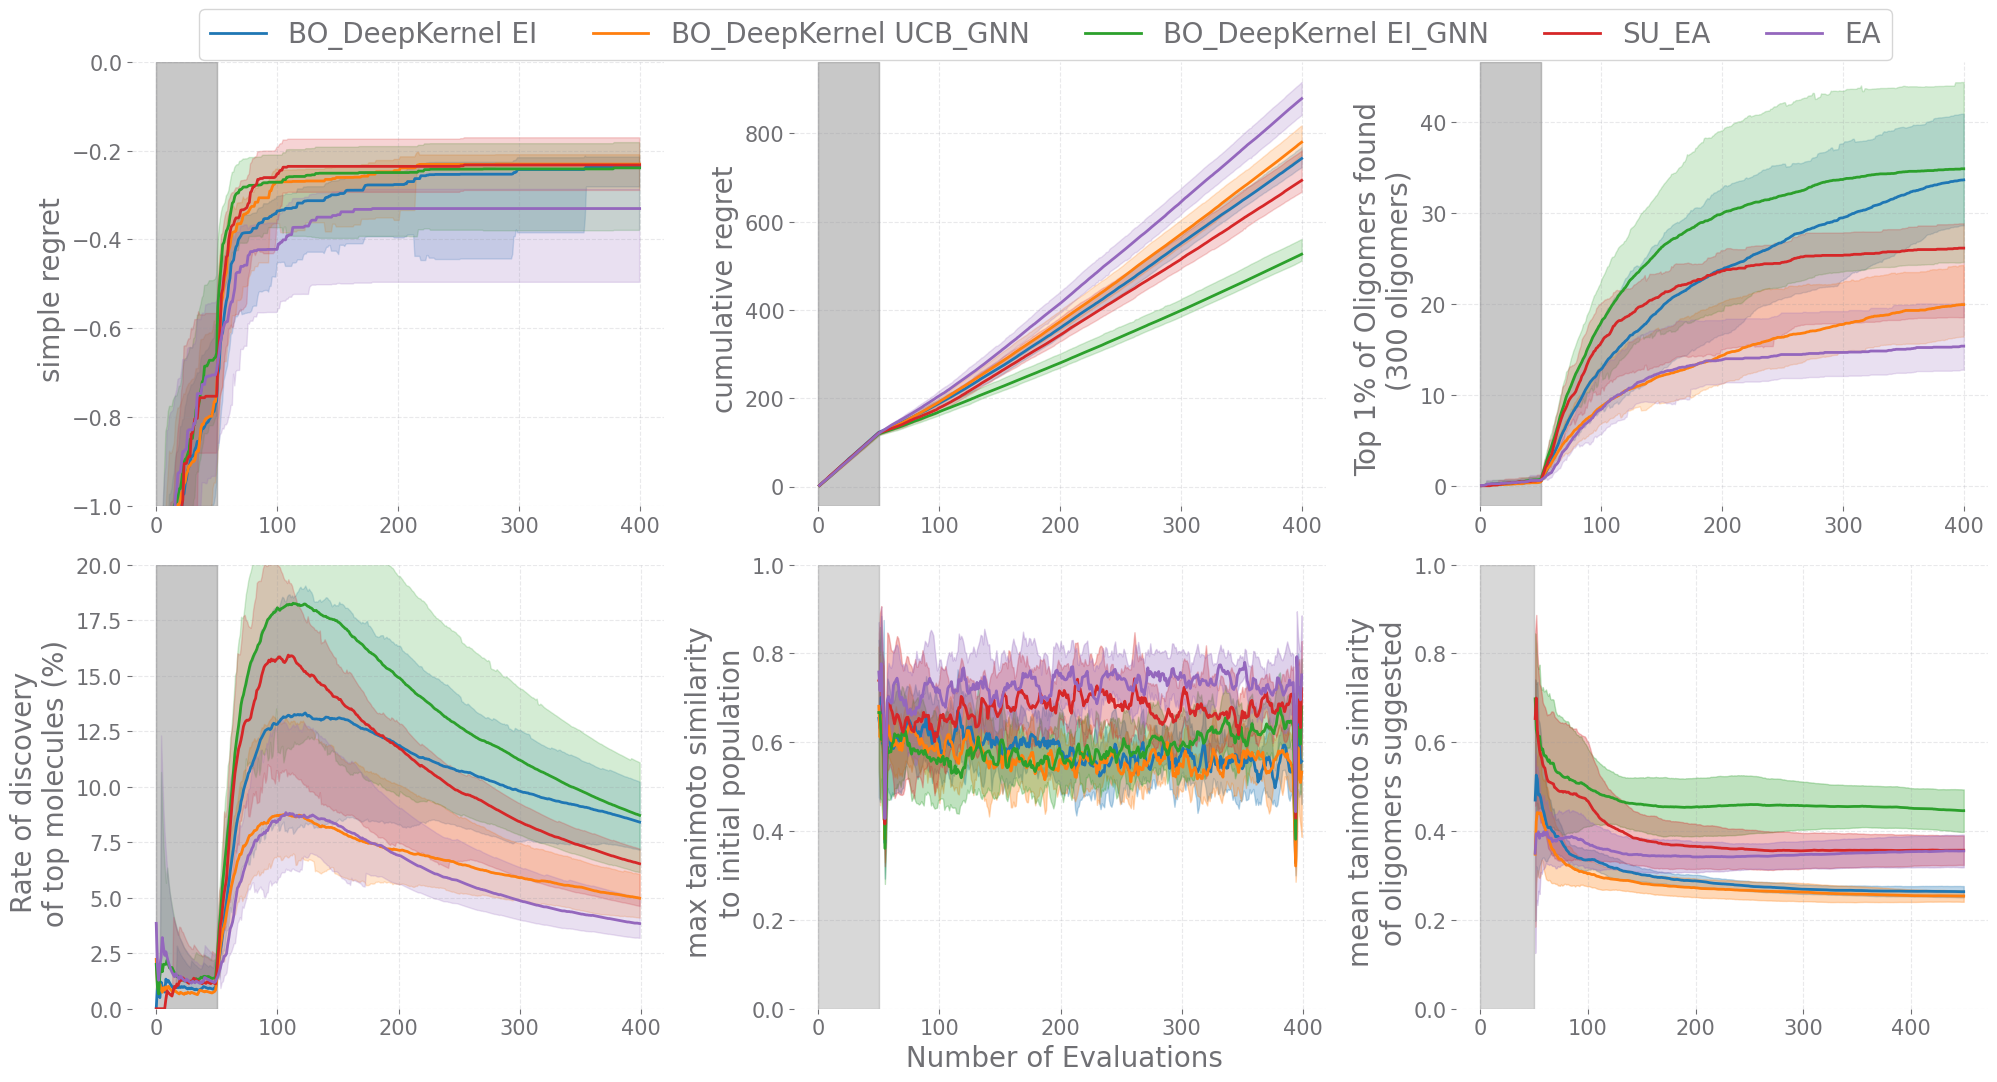

In [61]:
importlib.reload(plot_results_all.tanimoto_similarity_utils)
df_mol_dict = plot_results_all.load_mol_dict()
%matplotlib inline
df_plot = df_summary_1.copy()
df_plot = df_plot.iloc[[0,7,8,9,11]]
legend_list = ['BO_DeepKernel EI', 'BO_DeepKernel EI_GNN', 'BO_DeepKernel UCB_GNN','SU_EA','EA']#'BO_DK','BO_DK new','SU EA','SU_EA New'


fig, axes,metric_dict_res = plot_results_all.plot_metric(df_plot,plot_function_list_single,results_dict,df_list,nb_iterations=min_num_iteration)
df_mol_dict = plot_results_all.add_similarity_plots(axes,df_plot,df_mol_dict,results_dict, nb_iterations=min_num_iteration,  nb_initialisation=50)
plot_results_all.save_mol_dict(df_mol_dict)
for ax_ in axes:
    ax_.set_xlabel('')

# update the axes geometry information
from matplotlib import gridspec
gs = gridspec.GridSpec(len(fig.axes), 3)
fig.set_size_inches(20, 30)
for i, ax in enumerate(fig.axes):
    ax.set_subplotspec(gs[i])
# set font size
for ax in fig.get_axes():
    ax.tick_params(axis='both', which='major', labelsize=15)
    ax.set_xlabel(ax.get_xlabel(), fontsize=20)
    ax.set_ylabel(ax.get_ylabel(), fontsize=20)
# hide legend
axes[0].legend().set_visible(False)
fig.tight_layout()
lg = axes[0].legend(loc='upper left', bbox_to_anchor=(0.1, 1.15), ncol=6,fontsize=20)
for i in range(len(legend_list)):
    lg.texts[i].set_text(legend_list[i])

axes[0].set_ylim(-1,0)
axes[3].set_ylim(0,20)
# rename x ticks
axes[4].axvspan(0, 50, alpha=0.3, color="grey")
axes[5].axvspan(0, 50, alpha=0.3, color="grey")
axes[4].set_ylabel("max tanimoto similarity \n to initial population")
axes[4].set_xlabel(' Number of Evaluations', fontsize=20)
axes[2].set_ylabel("Top 1% of Oligomers found \n (300 oligomers)")
fig_name = 'benchmarking_diff_dataset_size'
os.makedirs(save_folder,exist_ok=True)
pickle.dump(fig, open(save_folder+f'/{fig_name}.pkl','wb'))


 keys : 0    BO_learned_new*selected*EI*/rds/general/user/m...
1    BO_learned_new*selected*EI*/rds/general/user/m...
7    ea_surrogate_new*selected*EI*/rds/general/user...
8    ea_surrogate_new*selected*EI*/rds/general/user...
9    evolution_algorithm*selected*EI**data/output/F...
Name: key, dtype: object


/rds/general/user/ma11115/home/anaconda3/envs/Geom3D/lib/python3.11/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/rds/general/user/ma11115/home/anaconda3/envs/Geom3D/lib/python3.11/site-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/rds/general/user/ma11115/home/anaconda3/envs/Geom3D/lib/python3.11/site-packages/numpy/core/_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


len of mol_dataset 59952


/rds/general/user/ma11115/home/anaconda3/envs/Geom3D/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/rds/general/user/ma11115/home/anaconda3/envs/Geom3D/lib/python3.11/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


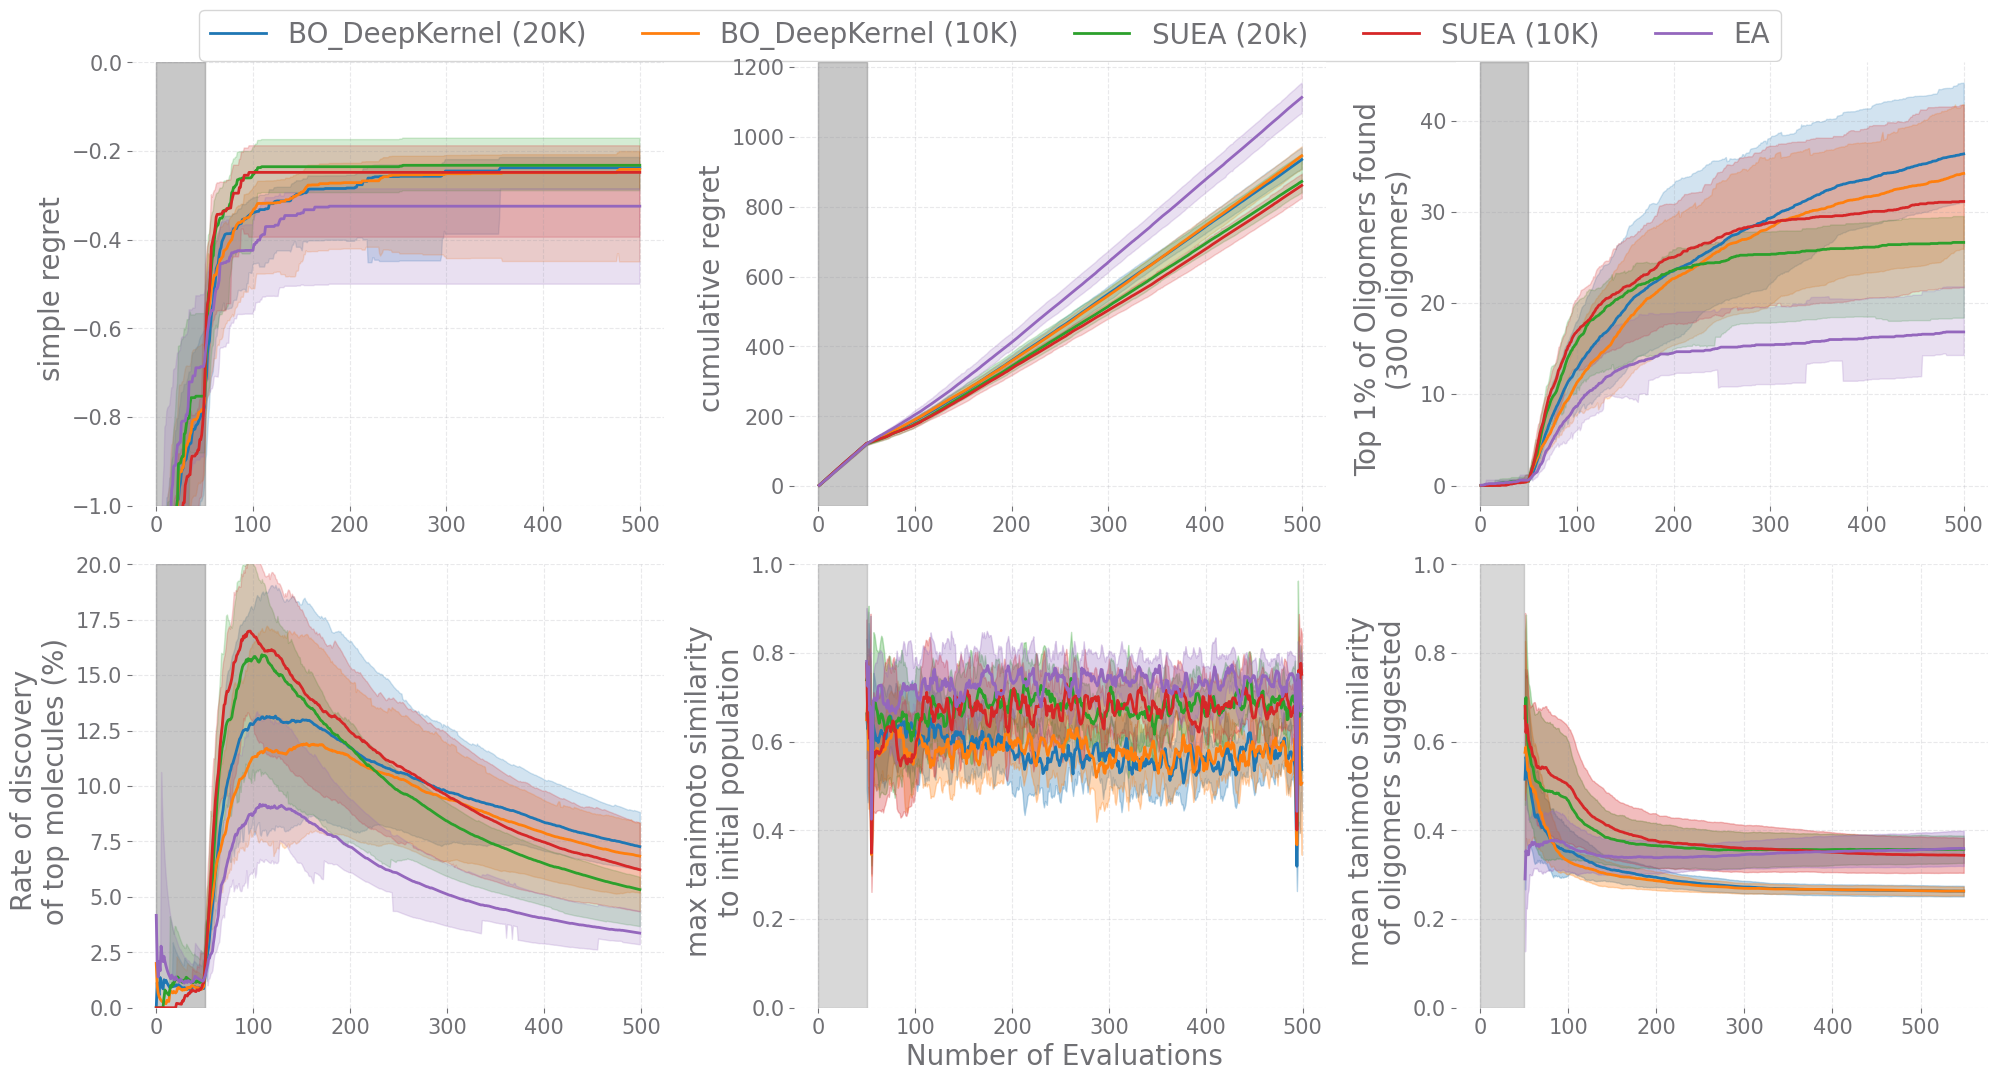

In [14]:
importlib.reload(plot_results_all.tanimoto_similarity_utils)
df_mol_dict = plot_results_all.load_mol_dict()
%matplotlib inline
df_plot = df_summary_1.copy()
df_plot = df_plot.iloc[[0,1,7,8,9]]
legend_list = ['BO_DeepKernel (20K)', 'BO_DeepKernel (10K)','SUEA (20k)','SUEA (10K)','EA']#'BO_DK','BO_DK new','SU EA','SU_EA New'


fig, axes,metric_dict_res = plot_results_all.plot_metric(df_plot,plot_function_list_single,results_dict,df_list,nb_iterations=min_num_iteration)
df_mol_dict = plot_results_all.add_similarity_plots(axes,df_plot,df_mol_dict,results_dict, nb_iterations=min_num_iteration,  nb_initialisation=50)
plot_results_all.save_mol_dict(df_mol_dict)
for ax_ in axes:
    ax_.set_xlabel('')

# update the axes geometry information
from matplotlib import gridspec
gs = gridspec.GridSpec(len(fig.axes), 3)
fig.set_size_inches(20, 30)
for i, ax in enumerate(fig.axes):
    ax.set_subplotspec(gs[i])
# set font size
for ax in fig.get_axes():
    ax.tick_params(axis='both', which='major', labelsize=15)
    ax.set_xlabel(ax.get_xlabel(), fontsize=20)
    ax.set_ylabel(ax.get_ylabel(), fontsize=20)
# hide legend
axes[0].legend().set_visible(False)
fig.tight_layout()
lg = axes[0].legend(loc='upper left', bbox_to_anchor=(0.1, 1.15), ncol=6,fontsize=20)
for i in range(len(legend_list)):
    lg.texts[i].set_text(legend_list[i])

axes[0].set_ylim(-1,0)
axes[3].set_ylim(0,20)
# rename x ticks
axes[4].axvspan(0, 50, alpha=0.3, color="grey")
axes[5].axvspan(0, 50, alpha=0.3, color="grey")
axes[4].set_ylabel("max tanimoto similarity \n to initial population")
axes[4].set_xlabel(' Number of Evaluations', fontsize=20)
axes[2].set_ylabel("Top 1% of Oligomers found \n (300 oligomers)")
fig_name = 'benchmarking_diff_dataset_size'
os.makedirs(save_folder,exist_ok=True)
pickle.dump(fig, open(save_folder+f'/{fig_name}.pkl','wb'))


 keys : 0    BO_learned_new*selected*EI*/rds/general/user/m...
2    BO_learned_new*selected*UCB*/rds/general/user/...
3    BO_learned_new*selected*max_sigma*/rds/general...
4    BO_learned_new*selected*max_y_hat*/rds/general...
Name: key, dtype: object


/rds/general/user/ma11115/home/anaconda3/envs/Geom3D/lib/python3.11/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/rds/general/user/ma11115/home/anaconda3/envs/Geom3D/lib/python3.11/site-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/rds/general/user/ma11115/home/anaconda3/envs/Geom3D/lib/python3.11/site-packages/numpy/core/_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


len of mol_dataset 59952


/rds/general/user/ma11115/home/anaconda3/envs/Geom3D/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/rds/general/user/ma11115/home/anaconda3/envs/Geom3D/lib/python3.11/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


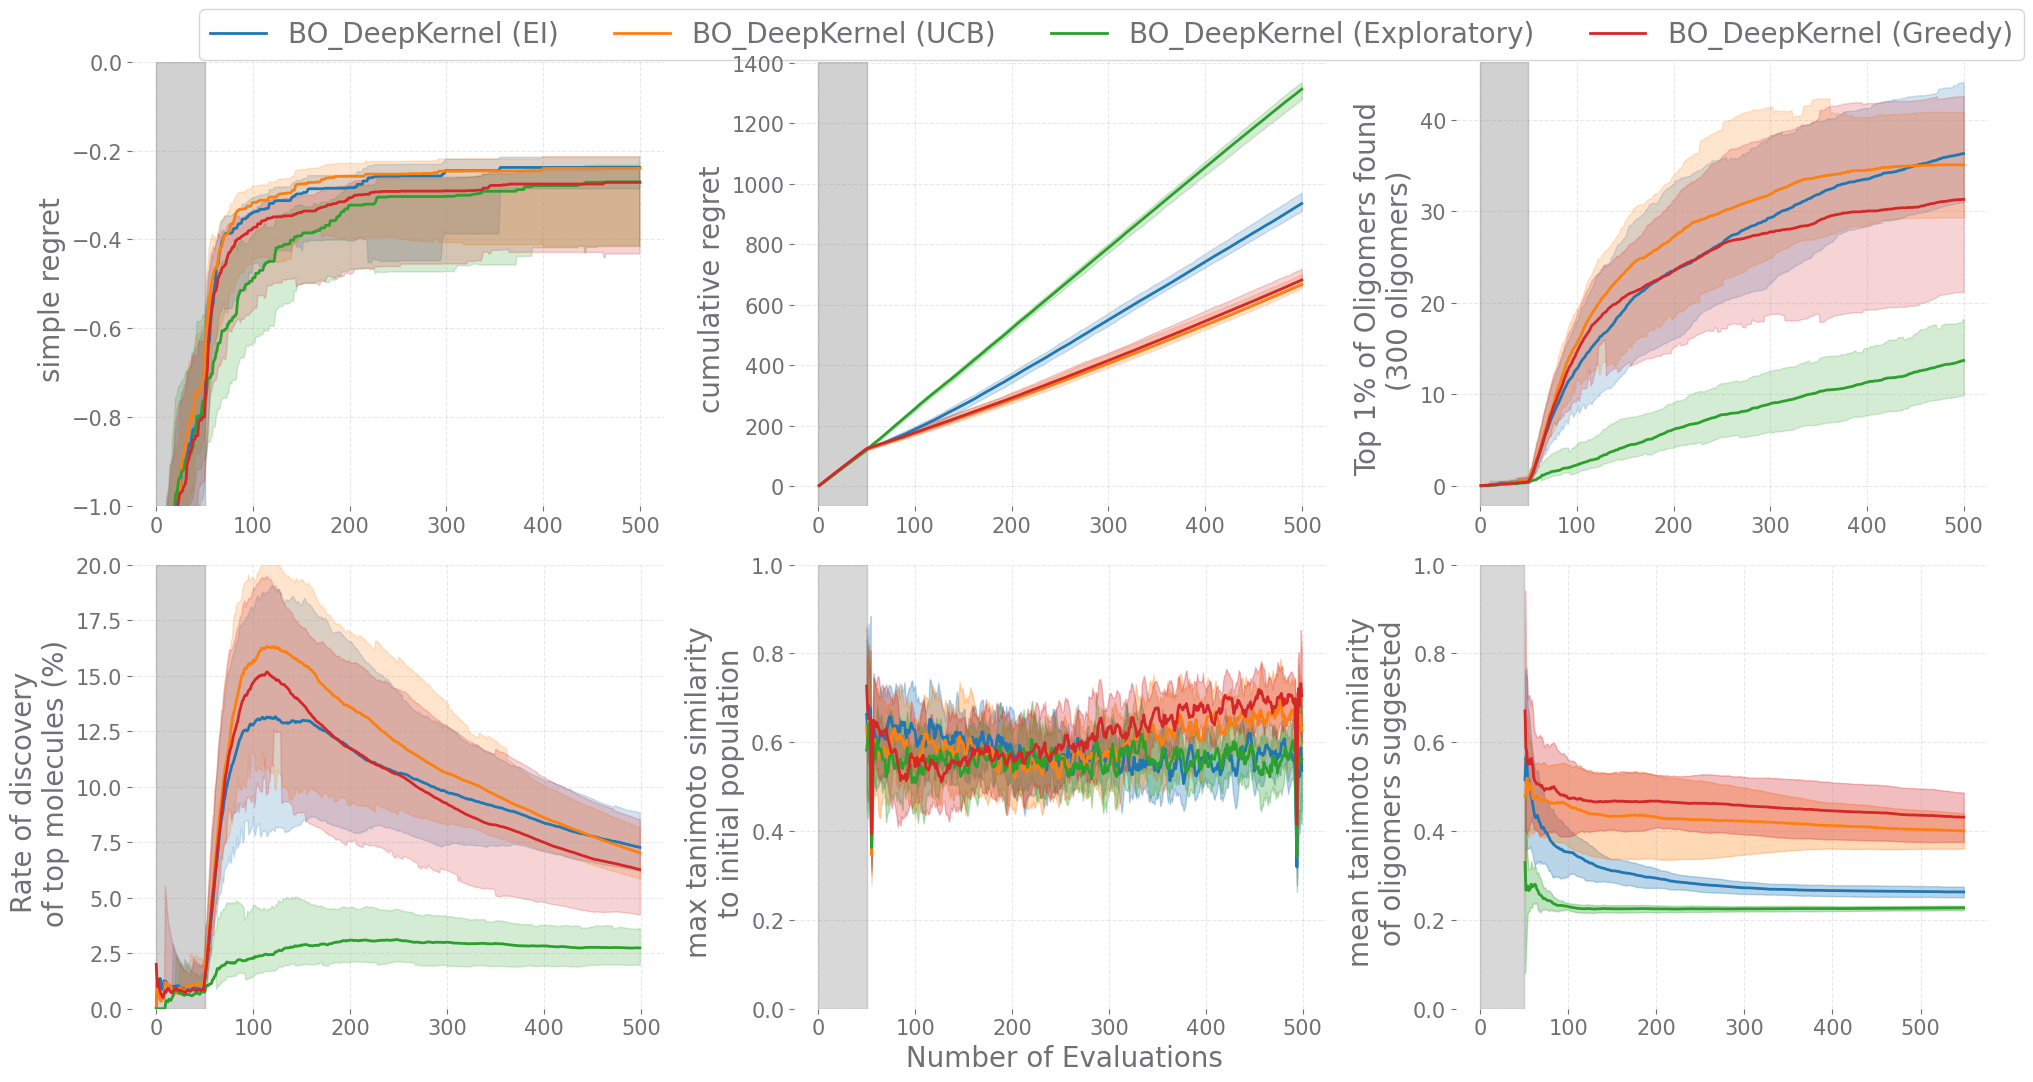

In [15]:
importlib.reload(plot_results_all.tanimoto_similarity_utils)
df_mol_dict = plot_results_all.load_mol_dict()
%matplotlib inline
df_plot = df_summary_1.copy()
df_plot = df_plot.iloc[[0,2,3,4]]
legend_list = ['BO_DeepKernel (EI)', 'BO_DeepKernel (UCB)','BO_DeepKernel (Exploratory)','BO_DeepKernel (Greedy)']#'BO_DK','BO_DK new','SU EA','SU_EA New'


fig, axes,metric_dict_res = plot_results_all.plot_metric(df_plot,plot_function_list_single,results_dict,df_list,nb_iterations=min_num_iteration)
df_mol_dict = plot_results_all.add_similarity_plots(axes,df_plot,df_mol_dict,results_dict, nb_iterations=min_num_iteration,  nb_initialisation=50)
plot_results_all.save_mol_dict(df_mol_dict)
for ax_ in axes:
    ax_.set_xlabel('')

# update the axes geometry information
from matplotlib import gridspec
gs = gridspec.GridSpec(len(fig.axes), 3)
fig.set_size_inches(20, 30)
for i, ax in enumerate(fig.axes):
    ax.set_subplotspec(gs[i])
# set font size
for ax in fig.get_axes():
    ax.tick_params(axis='both', which='major', labelsize=15)
    ax.set_xlabel(ax.get_xlabel(), fontsize=20)
    ax.set_ylabel(ax.get_ylabel(), fontsize=20)
# hide legend
axes[0].legend().set_visible(False)
fig.tight_layout()
lg = axes[0].legend(loc='upper left', bbox_to_anchor=(0.1, 1.15), ncol=6,fontsize=20)
for i in range(len(legend_list)):
    lg.texts[i].set_text(legend_list[i])

axes[0].set_ylim(-1,0)
axes[3].set_ylim(0,20)
# rename x ticks
axes[4].axvspan(0, 50, alpha=0.3, color="grey")
axes[5].axvspan(0, 50, alpha=0.3, color="grey")
axes[4].set_ylabel("max tanimoto similarity \n to initial population")
axes[4].set_xlabel(' Number of Evaluations', fontsize=20)
axes[2].set_ylabel("Top 1% of Oligomers found \n (300 oligomers)")
fig_name = 'benchmarking_diff_acquisition function'
os.makedirs(save_folder,exist_ok=True)
pickle.dump(fig, open(save_folder+f'/{fig_name}.pkl','wb'))


 keys : 0    BO_learned_new*selected*EI*/rds/general/user/m...
1    BO_precursor*all*EI**data/output/Full_dataset/...
2    BO_precursor*selected*EI**data/output/Full_dat...
3    ea_surrogate_new*selected*EI*/rds/general/user...
4    evolution_algorithm*selected*EI**data/output/F...
5    random*selected*EI**data/output/Full_dataset/3...
Name: key, dtype: object


/rds/general/user/ma11115/home/anaconda3/envs/Geom3D/lib/python3.11/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/rds/general/user/ma11115/home/anaconda3/envs/Geom3D/lib/python3.11/site-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/rds/general/user/ma11115/home/anaconda3/envs/Geom3D/lib/python3.11/site-packages/numpy/core/_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


len of mol_dataset 58853


/rds/general/user/ma11115/home/anaconda3/envs/Geom3D/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/rds/general/user/ma11115/home/anaconda3/envs/Geom3D/lib/python3.11/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


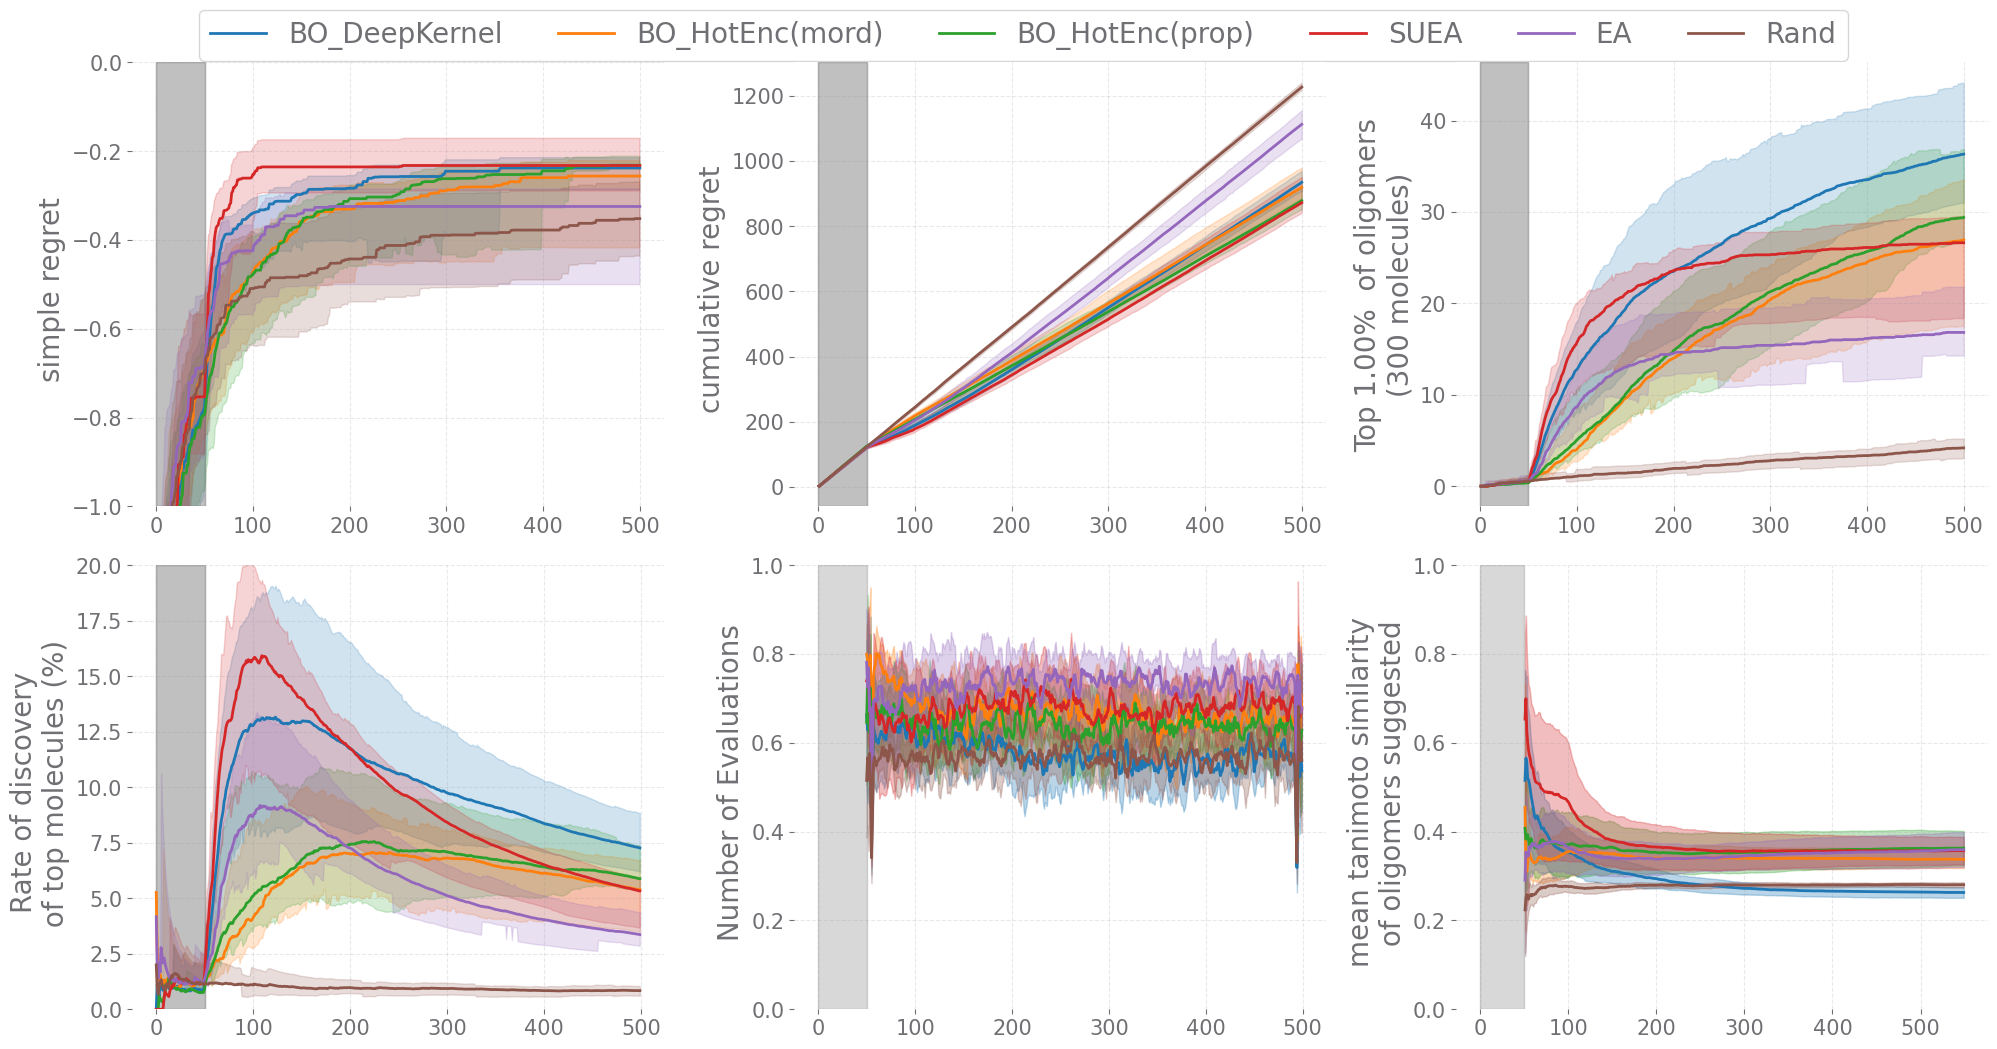

In [20]:
importlib.reload(plot_results_all.tanimoto_similarity_utils)
df_mol_dict = plot_results_all.load_mol_dict()
%matplotlib inline
df_plot = df_summary_1.copy()
df_plot = df_plot#.iloc[[0,1,2,3,4,5,6]]
legend_list = ['BO_DeepKernel', 'BO_HotEnc(mord)','BO_HotEnc(prop)','SUEA','EA','Rand']#'BO_DK','BO_DK new','SU EA','SU_EA New'


fig, axes,metric_dict_res = plot_results_all.plot_metric(df_plot,plot_function_list_single,results_dict,df_list,nb_iterations=min_num_iteration)
df_mol_dict = plot_results_all.add_similarity_plots(axes,df_plot,df_mol_dict,results_dict, nb_iterations=min_num_iteration,  nb_initialisation=50)
plot_results_all.save_mol_dict(df_mol_dict)
for ax_ in axes:
    ax_.set_xlabel('')

# update the axes geometry information
from matplotlib import gridspec
gs = gridspec.GridSpec(len(fig.axes), 3)
fig.set_size_inches(20, 30)
for i, ax in enumerate(fig.axes):
    ax.set_subplotspec(gs[i])
# set font size
for ax in fig.get_axes():
    ax.tick_params(axis='both', which='major', labelsize=15)
    ax.set_xlabel(ax.get_xlabel(), fontsize=20)
    ax.set_ylabel(ax.get_ylabel(), fontsize=20)
# hide legend
axes[0].legend().set_visible(False)
fig.tight_layout()
lg = axes[0].legend(loc='upper left', bbox_to_anchor=(0.1, 1.15), ncol=6,fontsize=20)
for i in range(len(legend_list)):
    lg.texts[i].set_text(legend_list[i])

axes[0].set_ylim(-1,0)
axes[3].set_ylim(0,20)
# rename x ticks
axes[4].axvspan(0, 50, alpha=0.3, color="grey")
axes[5].axvspan(0, 50, alpha=0.3, color="grey")
axes[4].set_ylabel("max tanimoto similarity \n to initial population")
axes[4].set_xlabel(' Number of Evaluations', fontsize=20)
axes[2].set_ylabel("Top 1% of Oligomers found \n (300 oligomers)")
fig_name = 'benchmarking_all_search_alg'
os.makedirs(save_folder,exist_ok=True)
pickle.dump(fig, open(save_folder+f'/{fig_name}.pkl','wb'))


 keys : 0    BO_learned_new*selected*EI*/rds/general/user/m...
1    BO_precursor*all*EI**data/output/Full_dataset/...
2    BO_precursor*selected*EI**data/output/Full_dat...
3    ea_surrogate_new*selected*EI*/rds/general/user...
4    evolution_algorithm*selected*EI**data/output/F...
5    random*selected*EI**data/output/Full_dataset/3...
Name: key, dtype: object
min_target is  -0.3176077110680689
min_target is  -0.3176077110680689
min_target is  -0.3176077110680689
min_target is  -0.3176077110680689
min_target is  -0.3176077110680689
min_target is  -0.3176077110680689


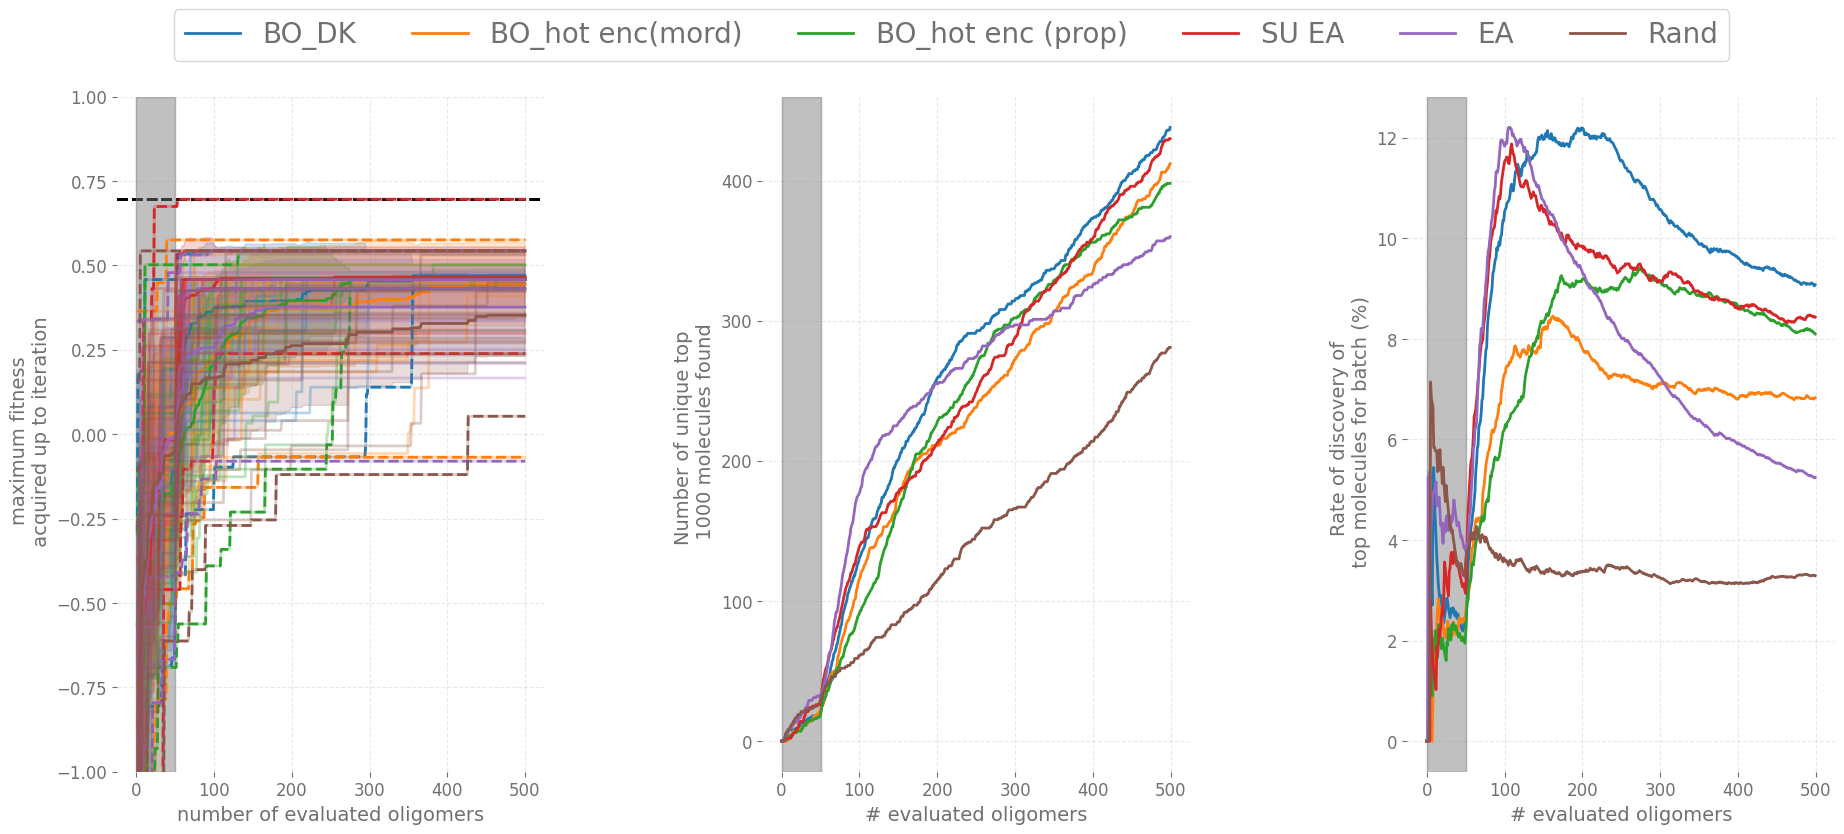

In [153]:
importlib.reload(plot_results_all)
df_mol_dict = plot_results_all.load_mol_dict()
%matplotlib inline
df_plot = df_summary_1.copy()
df_plot = df_plot#.iloc[[0,1,2,3,4,5,6]]
legend_list = ['BO_DK','BO_hot enc(mord)','BO_hot enc (prop)','SU EA','EA','Rand']


fig, axes,metric_dict_res = plot_results_all.plot_metric(df_plot,plot_function_list_multi,results_dict,df_list,nb_iterations=min_num_iteration,num_results_min=20)
axes[0].legend().set_visible(False)
fig.tight_layout()

axes[0].set_ylim(-1,1)
# delete axes in the second row
for _ax  in axes[3:]:
    _ax.set_visible(False)
from matplotlib import gridspec
gs = gridspec.GridSpec(len(fig.axes), 3)
fig.set_size_inches(20, 15)
lg = axes[0].legend(loc='upper left', bbox_to_anchor=(0.1, 1.15), ncol=6,fontsize=20)
for i in range(len(legend_list)):
    lg.texts[i].set_text(legend_list[i])

 keys : 0    BO_learned_new*selected*EI*/rds/general/user/m...
1    BO_precursor*all*EI**data/output/Full_dataset/...
2    BO_precursor*selected*EI**data/output/Full_dat...
3    ea_surrogate_new*selected*EI*/rds/general/user...
4    evolution_algorithm*selected*EI**data/output/F...
5    random*selected*EI**data/output/Full_dataset/3...
Name: key, dtype: object
 number of new calculations 4037  number of new oligomers in top  117  for key  BO_learned_new*selected*EI*/rds/general/user/ma11115/home/STK_Search/STK_search/data/representation_learning/6-frag/target/240516//SchNet/splitrand-nummol20000/*data/output/Full_dataset/30K_benchmark_150524.csv*data/output/Prescursor_data/precursor_data_200324.pkl
 number of new calculations 5389  number of new oligomers in top  98  for key  BO_precursor*all*EI**data/output/Full_dataset/30K_benchmark_150524.csv*data/output/Prescursor_data/df_PCA_mordred_descriptor_290224.pkl
 number of new calculations 4079  number of new oligomers in top  100  for ke

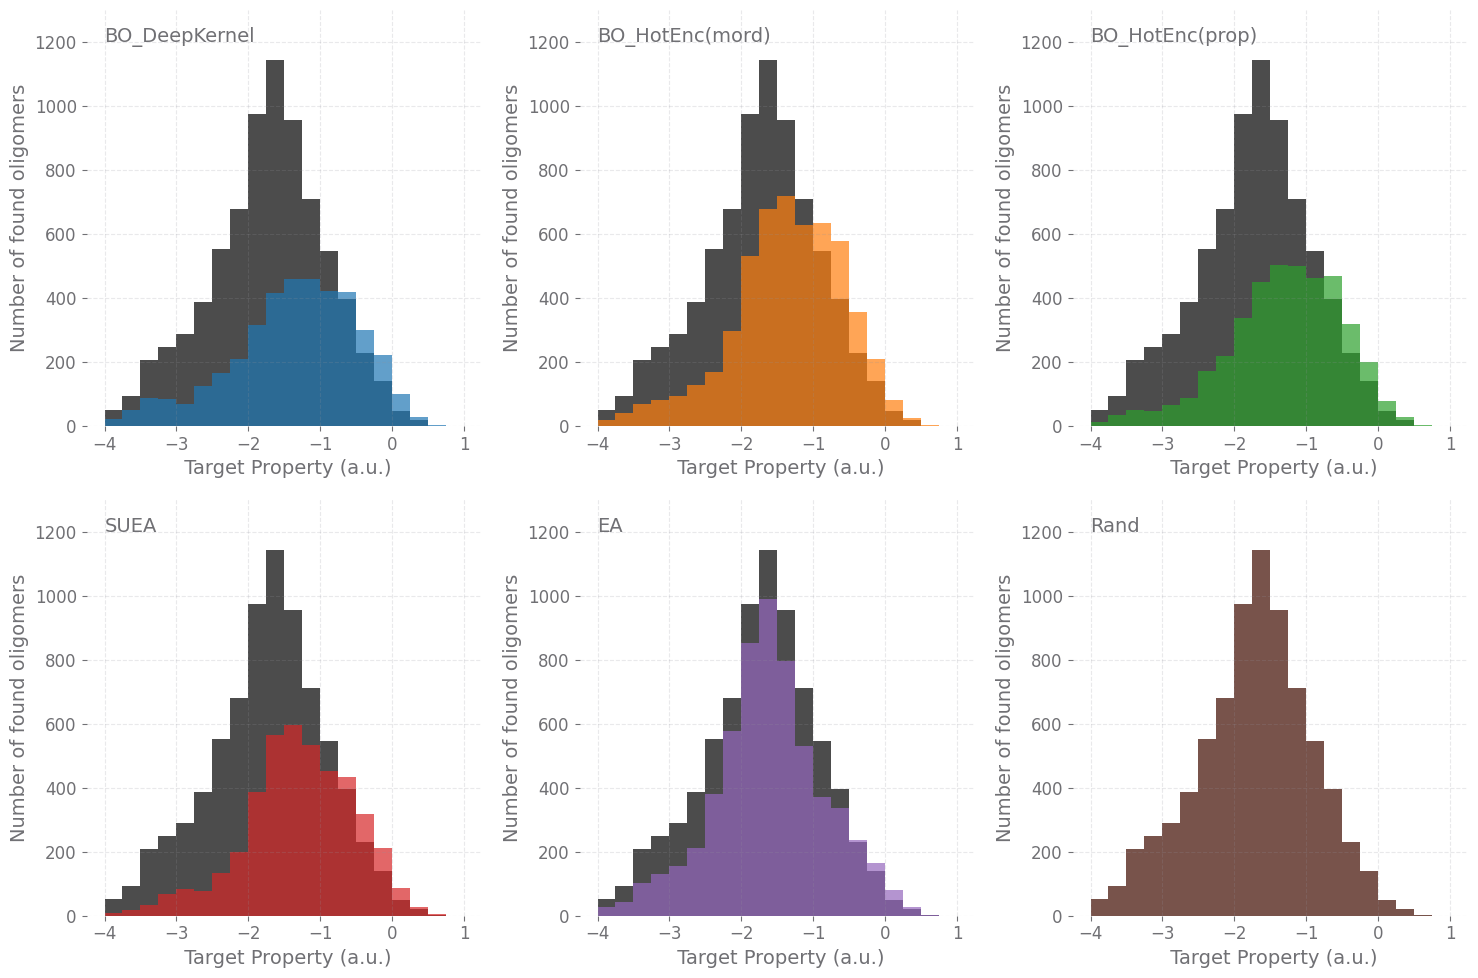

In [33]:
#df_mol_dict = plot_results_all.load_mol_dict()
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
df_plot = df_summary_1.copy()
#df_plot = df_plot.iloc[[0,2,3,4,6,7]]
#legend_list = ['BO_DK','BO_hot enc(mord)','BO_hot enc (prop)','SU EA','EA','Rand']
df_plot = df_plot.iloc[[0,1,2,3,4,5]]
legend_list = ['BO_DeepKernel', 'BO_HotEnc(mord)','BO_HotEnc(prop)','SUEA','EA','Rand']#'BO_DK','BO_DK new','SU EA','SU_EA New'
fig,ax = plt.subplots(2,3,figsize=(15,10))

ax= ax.flatten()
color_list = sns.color_palette("tab10", len(df_plot))
df_plot["color"] = color_list
df_max_found_dict = {}
#df_results_dict = {}
keys = df_plot["key"]
print(" keys :", keys)
min_target = df_Benchmark[target].iloc[int(df_Benchmark.shape[0]*0.01)]
range_res = (-4,1)


for i,key in enumerate(keys.values):
    res = results_dict[key]
    color = df_plot[df_plot["key"] == key]["color"].iloc[0]


    metric_dict = {}


    df_results, df_max_found = Search_results_plot.get_df_max_target_found(
        res[:20],
        max_iteration=500,
        df_total=df_Benchmark,
        num_initialisation=50,
        target_name=target,

        min_target=min_target,
    )

    #df_max_found = df_max_found[~df_max_found['InChIKey'].isin(df_total_old['InChIKey'])]
    #df_Benchmark.hist(target,bins=20,ax=ax[i],color='black',alpha=0.5,range=range_res)
    
    df_results_dict[rand_key] .hist(target,bins=20,ax=ax[i],label=key,color='black',alpha=0.7,range=range_res)

    df_results.hist(target,bins=20,ax=ax[i],label=key,color=color,alpha=0.7,range=range_res)

    #d#f_max_found.hist(target_name,bins=50,ax=ax[1],label=key,color=color,alpha=0.7,range=range_max,density=False)
    df_max_found_dict[key] = df_max_found
    df_results_dict[key] = df_results
    print(' number of new calculations',df_results.shape[0],' number of new oligomers in top ',df_max_found.shape[0],' for key ',key)
    #print('rate of discovery', df_max_found.shape[0]/df_results.shape[0])
    rand_key = 'random*selected*EI**data/output/Full_dataset/30K_benchmark_150524.csv*data/output/Prescursor_data/precursor_data_200324.pkl'
    ax[i].set_ylabel("Number of found oligomers")
    ax[i].set_xlabel(' Target Property (a.u.)')

    ax[i].set_title('')
    ax[i].set_ylim(0,1300)
    #ax[i].set_xlim(0.4,1)

fig.tight_layout()
for i in range(len(legend_list)):
    ax[i].text(-4,1200,legend_list[i])

fig_name = 'hist_toatl_benchmark'
os.makedirs(save_folder,exist_ok=True)
pickle.dump(fig, open(save_folder+f'/{fig_name}.pkl','wb'))

 keys : 0    BO_learned_new*selected*EI*/rds/general/user/m...
1    BO_precursor*all*EI**data/output/Full_dataset/...
2    BO_precursor*selected*EI**data/output/Full_dat...
3    ea_surrogate_new*selected*EI*/rds/general/user...
4    evolution_algorithm*selected*EI**data/output/F...
5    random*selected*EI**data/output/Full_dataset/3...
Name: key, dtype: object
 number of new calculations 4037  number of new oligomers in top  117  for key  BO_learned_new*selected*EI*/rds/general/user/ma11115/home/STK_Search/STK_search/data/representation_learning/6-frag/target/240516//SchNet/splitrand-nummol20000/*data/output/Full_dataset/30K_benchmark_150524.csv*data/output/Prescursor_data/precursor_data_200324.pkl
 number of new calculations 5389  number of new oligomers in top  98  for key  BO_precursor*all*EI**data/output/Full_dataset/30K_benchmark_150524.csv*data/output/Prescursor_data/df_PCA_mordred_descriptor_290224.pkl
 number of new calculations 4079  number of new oligomers in top  100  for ke

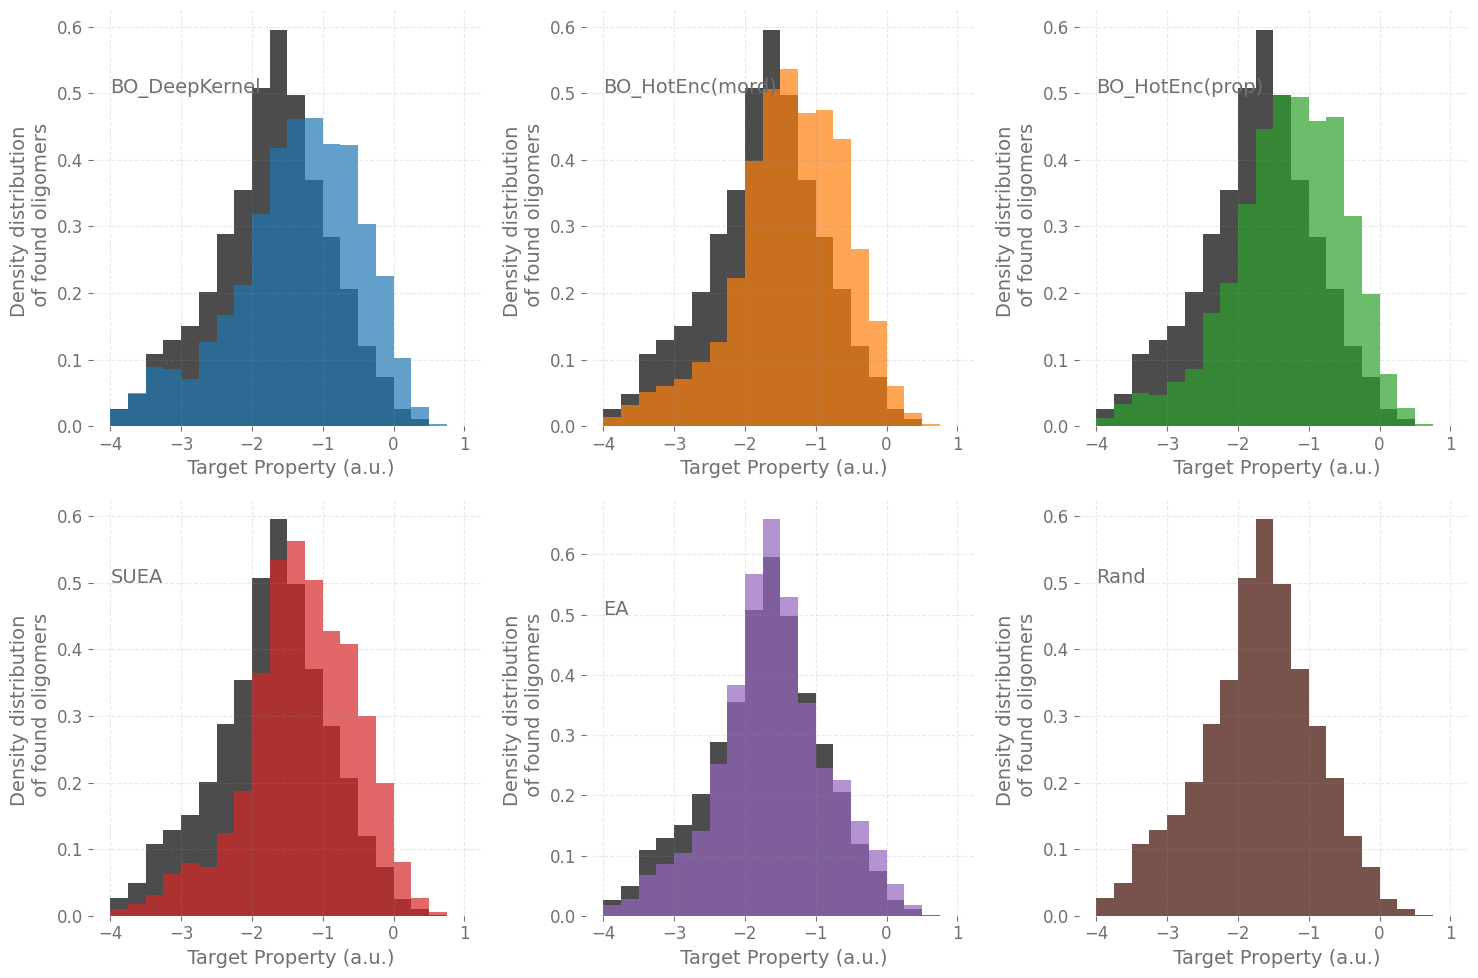

In [35]:
#df_mol_dict = plot_results_all.load_mol_dict()
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
df_plot = df_summary_1.copy()
#df_plot = df_plot.iloc[[0,2,3,4,6,7]]
#legend_list = ['BO_DK','BO_hot enc(mord)','BO_hot enc (prop)','SU EA','EA','Rand']
df_plot = df_plot.iloc[[0,1,2,3,4,5]]
legend_list = ['BO_DeepKernel', 'BO_HotEnc(mord)','BO_HotEnc(prop)','SUEA','EA','Rand']#'BO_DK','BO_DK new','SU EA','SU_EA New'
fig,ax = plt.subplots(2,3,figsize=(15,10))

ax= ax.flatten()
color_list = sns.color_palette("tab10", len(df_plot))
df_plot["color"] = color_list
df_max_found_dict = {}
#df_results_dict = {}
keys = df_plot["key"]
print(" keys :", keys)
min_target = df_Benchmark[target].iloc[int(df_Benchmark.shape[0]*0.01)]
range_res = (-4,1)


for i,key in enumerate(keys.values):
    res = results_dict[key]
    color = df_plot[df_plot["key"] == key]["color"].iloc[0]


    metric_dict = {}


    df_results, df_max_found = Search_results_plot.get_df_max_target_found(
        res[:20],
        max_iteration=500,
        df_total=df_Benchmark,
        num_initialisation=50,
        target_name=target,

        min_target=min_target,
    )

    #df_max_found = df_max_found[~df_max_found['InChIKey'].isin(df_total_old['InChIKey'])]
    #df_Benchmark.hist(target,bins=20,ax=ax[i],color='black',alpha=0.5,range=range_res)
    
    df_results_dict[rand_key] .hist(target,bins=20,ax=ax[i],label=key,color='black',alpha=0.7,range=range_res,density=True)

    df_results.hist(target,bins=20,ax=ax[i],label=key,color=color,alpha=0.7,range=range_res,density=True)

    #d#f_max_found.hist(target_name,bins=50,ax=ax[1],label=key,color=color,alpha=0.7,range=range_max,density=False)
    df_max_found_dict[key] = df_max_found
    df_results_dict[key] = df_results
    print(' number of new calculations',df_results.shape[0],' number of new oligomers in top ',df_max_found.shape[0],' for key ',key)
    #print('rate of discovery', df_max_found.shape[0]/df_results.shape[0])
    rand_key = 'random*selected*EI**data/output/Full_dataset/30K_benchmark_150524.csv*data/output/Prescursor_data/precursor_data_200324.pkl'
    ax[i].set_ylabel("Density distribution \n of found oligomers")
    ax[i].set_xlabel(' Target Property (a.u.)')

    ax[i].set_title('')
    #ax[i].set_ylim(0,1300)
    #ax[i].set_xlim(0.4,1)

fig.tight_layout()
for i in range(len(legend_list)):
    ax[i].text(-4,0.5,legend_list[i])

fig_name = 'hist_toatl_benchmark'
os.makedirs(save_folder,exist_ok=True)
pickle.dump(fig, open(save_folder+f'/{fig_name}.pkl','wb'))